# 太阳赤纬

In [ ]:
import pandas as pd
import numpy as np
from math import sin, radians

def calculate_declination(doy):
    # 太阳赤纬公式（单位：度）
    return 23.45 * sin(radians((360 / 365) * (doy - 81)))
# 1. 读取 Excel 文件
df = pd.read_excel('/content/drive/MyDrive/天气归一化输入数据/A_1993to2020_58238.xlsx')

# 2. 使用 DOY 列计算赤纬（替换 Unix 列）
df['Unix'] = df['DOY'].apply(lambda doy: round(calculate_declination(doy), 2))

# 3. 可选：重命名列（可改为 'Declination'）
df.rename(columns={'Unix': 'Declination'}, inplace=True)

# 保存为新文件
df.to_excel('/content/drive/MyDrive/天气归一化输入数据/A_1993to2020_58238.xlsx', index=False)

# 提取时间

In [ ]:
#提取时间
import pandas as pd

# 读取原始 Excel 文件
input_file = '/content/drive/MyDrive/Inputdata/50468.xlsx'
df = pd.read_excel(input_file)

# 将 'Year', 'Month', 'Day' 列合并为日期
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# 提取 2010-2020 年的数据
df_2013_2020 = df[df['Date'].dt.year.between(2013, 2013)].copy()

# 删除空值
df_2013_2020.dropna(inplace=True)

# 新增：按日期去重（保留第一条记录）
df_2013_2020 = df_2013_2020.drop_duplicates(
    subset=['Date'],  # 根据日期去重
    keep='first'      # 保留首次出现的记录
)

# 删除临时日期列
df_2013_2020.drop(columns=['Date'], inplace=True)

# 保存结果
output_file = '/content/drive/MyDrive/Inputdata/2013_50468.xlsx'
df_2013_2020.to_excel(output_file, index=False)

print(f"处理完成：已删除{len(df)-len(df_2013_2020)}行，保存至 {output_file}")


处理完成：已删除21552行，保存至 /content/drive/MyDrive/Inputdata/2013_50468.xlsx


In [ ]:
#提取时间，所有站点
import pandas as pd
import os

# 站点列表
stations = [
    '52533', '52681',  # 甘肃
    '59287', '59316',  # 广东
    '57957', '59431', '59644',  # 广西
    '57816',  # 贵州
    '59758',  # 海南
    '50527', '50834', '53068', '53336', '53543', '54102', '54135',  # 内蒙古
    '53614', '53817',  # 宁夏
    '52866', '56029', '56043',  # 青海
    '57245',  # 陕西
    '56146', '56173', '56666',  # 四川
    '55228', '55299', '56137',  # 西藏
    '51076', '51133', '51567', '51573', '51628', '51709', '51828', '52203',  # 新疆
    '56651', '56739', '56778',  # 云南
    '57516'  # 重庆
]


for station in stations:
    try:
        # 动态生成文件路径
        input_file = f'/content/drive/MyDrive/Inputdata/{station}.xlsx'
        output_file = f'/content/drive/MyDrive/Inputdata/2010to2020_{station}.xlsx'

        # 读取数据
        df = pd.read_excel(input_file)

        # 日期处理
        df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

        # 筛选时间范围，包含两端
        mask = df['Date'].dt.year.between(2010, 2020)
        df_filtered = df[mask].copy()

        # 数据清洗
        df_cleaned = df_filtered.dropna() \
                               .drop_duplicates(subset=['Date'], keep='first') \
                               .drop(columns=['Date'])

        # 保存结果
        df_cleaned.to_excel(output_file, index=False)
        print(f"成功处理 {station}: 原始数据 {len(df)} 行 → 处理后 {len(df_cleaned)} 行")

    except FileNotFoundError:
        print(f"文件 {input_file} 未找到，跳过处理")
    except Exception as e:
        print(f"处理 {station} 时发生错误：{str(e)}")

print("所有站点处理完成！")

成功处理 52533: 原始数据 10277 行 → 处理后 3420 行
成功处理 52681: 原始数据 11374 行 → 处理后 3369 行
成功处理 59287: 原始数据 11361 行 → 处理后 3538 行
成功处理 59316: 原始数据 11364 行 → 处理后 3560 行
成功处理 57957: 原始数据 11327 行 → 处理后 3284 行
成功处理 59431: 原始数据 11365 行 → 处理后 3252 行
成功处理 59644: 原始数据 9883 行 → 处理后 3276 行
成功处理 57816: 原始数据 10964 行 → 处理后 3167 行
成功处理 59758: 原始数据 11330 行 → 处理后 3582 行
成功处理 50527: 原始数据 11296 行 → 处理后 3524 行
成功处理 50834: 原始数据 10617 行 → 处理后 3560 行
成功处理 53068: 原始数据 11347 行 → 处理后 3557 行
成功处理 53336: 原始数据 10558 行 → 处理后 3569 行
成功处理 53543: 原始数据 10585 行 → 处理后 3574 行
成功处理 54102: 原始数据 11359 行 → 处理后 3535 行
成功处理 54135: 原始数据 11342 行 → 处理后 3582 行
成功处理 53614: 原始数据 11377 行 → 处理后 3447 行
成功处理 53817: 原始数据 11377 行 → 处理后 3513 行
成功处理 52866: 原始数据 11358 行 → 处理后 3501 行
成功处理 56029: 原始数据 11379 行 → 处理后 3591 行
成功处理 56043: 原始数据 10234 行 → 处理后 3441 行
成功处理 57245: 原始数据 11054 行 → 处理后 3510 行
成功处理 56146: 原始数据 9868 行 → 处理后 3566 行
成功处理 56173: 原始数据 9905 行 → 处理后 3511 行
成功处理 56666: 原始数据 10715 行 → 处理后 3575 行
成功处理 55228: 原始数据 11303 行 → 处理后 3457 行
成功处理 55299: 原始数

In [ ]:
#提取时间和气象重采样数据集，所有站点
import pandas as pd
import os

# 站点列表
'''
stations = [
    '50468', '50742', '50873', '50953', '53487', '53772', '53898', '53963',
    '54161', '54292', '54324', '54342', '54511', '54527', '54539', '54662',
    '54823', '54936', '57083', '57178', '57461', '57494', '57649', '57679',
    '57687', '57874', '57993', '58208', '58238', '58265', '58321', '58362',
    '58457', '58467', '58506', '58531', '58606', '58665', '58737', '58847'
]
'''
stations = [
    '52418', '52533', '52679', '52681', '52889', '52983', '57006',  # 甘肃
    '59082', '59287', '59316', '59485',  # 广东
    '57957', '59431', '59644',  # 广西
    '56691', '57713', '57816',  # 贵州
    '59758', '59948', '59981',  # 海南
    '50527', '50834', '52267', '53068', '53336', '53463', '53464', '53543', '53545', '54102', '54135',  # 内蒙古
    '53614', '53817',  # 宁夏
    '52754', '52818', '52866', '56029', '56043',  # 青海
    '53845', '53923', '57036', '57131', '57245',  # 陕西
    '56146', '56173', '56187', '56196', '56294', '56385', '56386', '56666', '57411', '57432', '57602', '57604',  # 四川
    '55228', '55299', '55591', '56137',  # 西藏
    '51076', '51133', '51379', '51431', '51463', '51567', '51573', '51628', '51644', '51709', '51777', '51828', '52203',  # 新疆
    '56586', '56651', '56739', '56778', '56959', '56985', '56989',  # 云南
    '57515', '57516'  # 重庆
]

for station in stations:
    try:
        # 动态生成文件路径
        input_file = f'/content/drive/MyDrive/Inputdata/{station}.xlsx'
        output_file = f'/content/drive/MyDrive/Inputdata/resam1990-2020_{station}.xlsx'

        # 读取数据
        df = pd.read_excel(input_file)

        # 日期处理
        df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

         # 筛选时间范围
        mask = df['Date'].dt.year.between(1990, 2020)
        df_filtered = df[mask].copy()

        # 先筛选需要保留的列
        keep_columns = ['Year', 'Month', 'Day', 'TCC', 'LCC', 'PRS',
                       'TEM', 'RHU', 'PRE', 'WIND', 'WINS', 'GST']
        df_selected = df_filtered[keep_columns + ['Date']]  # 临时保留Date列用于去重

        # 数据清洗
        df_cleaned = df_selected.dropna() \
                               .drop_duplicates(subset=['Date'], keep='first') \
                               .drop(columns=['Date'])

        # 保存结果
        df_cleaned.to_excel(output_file, index=False)
        print(f"成功处理 {station}: 原始数据 {len(df)} 行 → 处理后 {len(df_cleaned)} 行")

    except FileNotFoundError:
        print(f"文件 {input_file} 未找到，跳过处理")
    except Exception as e:
        print(f"处理 {station} 时发生错误：{str(e)}")

print("所有站点处理完成！")

文件 /content/drive/MyDrive/Inputdata/52418.xlsx 未找到，跳过处理
成功处理 52533: 原始数据 10277 行 → 处理后 9597 行
成功处理 52679: 原始数据 0 行 → 处理后 0 行
成功处理 52681: 原始数据 11374 行 → 处理后 10619 行
文件 /content/drive/MyDrive/Inputdata/52889.xlsx 未找到，跳过处理
成功处理 52983: 原始数据 5829 行 → 处理后 5211 行
文件 /content/drive/MyDrive/Inputdata/57006.xlsx 未找到，跳过处理
成功处理 59082: 原始数据 365 行 → 处理后 334 行
成功处理 59287: 原始数据 11361 行 → 处理后 10837 行
成功处理 59316: 原始数据 11364 行 → 处理后 10894 行
成功处理 59485: 原始数据 365 行 → 处理后 0 行
成功处理 57957: 原始数据 11327 行 → 处理后 10500 行
成功处理 59431: 原始数据 11365 行 → 处理后 10509 行
成功处理 59644: 原始数据 9883 行 → 处理后 8997 行
成功处理 56691: 原始数据 365 行 → 处理后 334 行
文件 /content/drive/MyDrive/Inputdata/57713.xlsx 未找到，跳过处理
成功处理 57816: 原始数据 10964 行 → 处理后 10278 行
成功处理 59758: 原始数据 11330 行 → 处理后 10816 行
文件 /content/drive/MyDrive/Inputdata/59948.xlsx 未找到，跳过处理
文件 /content/drive/MyDrive/Inputdata/59981.xlsx 未找到，跳过处理
成功处理 50527: 原始数据 11296 行 → 处理后 10651 行
成功处理 50834: 原始数据 10617 行 → 处理后 10085 行
文件 /content/drive/MyDrive/Inputdata/52267.xlsx 未找到，跳过处理
成功处理 53068:

In [ ]:
#删掉无用文件
import os

# 要删除的站点列表
to_remove = [
    '52418', '52679', '52889', '52983', '57006',
    '59082', '59485',
    '56691', '57713',
    '59948', '59981',
    '52267', '53463', '53464', '53545',
    '52754', '52818',
    '53845',
    '53923', '57036', '57131',
    '56187', '56196', '56294', '56385', '56386', '57411', '57432', '57602', '57604',
    '55591',
    '51379', '51431', '51463', '51644', '51777',
    '56586',
    '56959', '56985', '56989',
    '57515'
]

# 文件夹路径
folder = "/content/drive/MyDrive/Inputdata"

# 删除文件
for station in to_remove:
    file_path = os.path.join(folder, f"{station}.xlsx")
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"已删除：{file_path}")
    else:
        print(f"文件不存在，跳过：{file_path}")

文件不存在，跳过：/content/drive/MyDrive/Inputdata/52418.xlsx
已删除：/content/drive/MyDrive/Inputdata/52679.xlsx
文件不存在，跳过：/content/drive/MyDrive/Inputdata/52889.xlsx
已删除：/content/drive/MyDrive/Inputdata/52983.xlsx
文件不存在，跳过：/content/drive/MyDrive/Inputdata/57006.xlsx
已删除：/content/drive/MyDrive/Inputdata/59082.xlsx
已删除：/content/drive/MyDrive/Inputdata/59485.xlsx
已删除：/content/drive/MyDrive/Inputdata/56691.xlsx
文件不存在，跳过：/content/drive/MyDrive/Inputdata/57713.xlsx
文件不存在，跳过：/content/drive/MyDrive/Inputdata/59948.xlsx
文件不存在，跳过：/content/drive/MyDrive/Inputdata/59981.xlsx
文件不存在，跳过：/content/drive/MyDrive/Inputdata/52267.xlsx
已删除：/content/drive/MyDrive/Inputdata/53463.xlsx
文件不存在，跳过：/content/drive/MyDrive/Inputdata/53464.xlsx
文件不存在，跳过：/content/drive/MyDrive/Inputdata/53545.xlsx
文件不存在，跳过：/content/drive/MyDrive/Inputdata/52754.xlsx
文件不存在，跳过：/content/drive/MyDrive/Inputdata/52818.xlsx
文件不存在，跳过：/content/drive/MyDrive/Inputdata/53845.xlsx
已删除：/content/drive/MyDrive/Inputdata/53923.xlsx
文件不存在，跳过：/content/drive/MyDr

# 训练模型
需手动改变站号

## 分别运行

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
from random import choice
from sklearn.utils import shuffle
from joblib import dump, load

/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
station_id = 58321
#模型训练数据
df1 = pd.read_excel(f'/content/drive/MyDrive/天气归一化输入数据/A_2013to2020_{station_id}.xlsx',index_col=False)

X1 = df1[['Month','TCC','LCC','ST','P','T','RH','PRE','WS','WD','VMA','AOD','BLH','DOY','Declination','PM25','CO']]
y1 = df1['TR']


In [ ]:

def get_average(records):
    """
    平均值
    """
    return sum(records) / len(records)


def get_variance(records):
    """
    方差 反映一个数据集的离散程度
    """
    average = get_average(records)
    return sum([(x - average) ** 2 for x in records]) / len(records)


def get_standard_deviation(records):
    """
    标准差 == 均方差 反映一个数据集的离散程度
    """
    variance = get_variance(records)
    return math.sqrt(variance)


def get_rms(records):
    """
    均方根值 反映的是有效值而不是平均值
    """
    return math.sqrt(sum([x ** 2 for x in records]) / len(records))


def get_mse(records_real, records_predict):
    """
    均方误差 估计值与真值 偏差
    """
    if len(records_real) == len(records_predict):
        return sum([(x - y) ** 2 for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None


def get_rmse(records_real, records_predict):
    """
    均方根误差：是均方误差的算术平方根
    """
    mse = get_mse(records_real, records_predict)
    if mse:
        return math.sqrt(mse)
    else:
        return None


def get_mae(records_real, records_predict):
    """
    平均绝对误差
    """
    if len(records_real) == len(records_predict):
        return sum([abs(x - y) for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

#判断闰年
def is_leap_year(year):
    return  (year % 4 == 0 and year % 100 != 0) or year % 400 == 0

#这段代码的作用是计算FAC2（Fraction of Predictions within a Factor of 2），它是用来评估预测模型准确性的一个指标。
#FAC2测量的是预测值与真实值之间的相对误差，特别关注预测值是否在真实值的±50%范围内。
def get_fac2(records_real, records_predict):
    """
    FAC2
    """
    if len(records_real) == len(records_predict):
        list1=np.zeros(len(records_predict))
        num=0
        for i in range(len(records_predict)):
            if records_real[i]!=0:
                list1[i]=records_predict[i]/records_real[i]
                if list1[i]>=0.5 and list1[i]<=2:
                    num += 1
        return  num/len(list1)
    else:
        return None

def get_mb(records_real, records_predict):
    """
    均值偏差
    """
    if len(records_real) == len(records_predict):
        return sum([(y - x) for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

def get_mge(records_real, records_predict):
    """
    平均粗差
    """
    if len(records_real) == len(records_predict):
        return sum([abs(y - x) for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

def get_nmb(records_real, records_predict):
    """
    均值偏差归一化
    """
    if len(records_real) == len(records_predict):
        return sum([(y - x) for x, y in zip(records_real, records_predict)]) / sum(records_real)
    else:
        return None

def get_nmge(records_real, records_predict):
    """
    均值偏差归一化
    """
    if len(records_real) == len(records_predict):
        return sum([abs(y - x) for x, y in zip(records_real, records_predict)]) / sum(records_real)
    else:
        return None
    #     List3 = map(lambda (a,b):a/b,zip(predict,observation))

#用于计算 Index of Agreement (IOA)，这是一个衡量模型预测结果与实际观测值之间一致性的指标。
#IOA 指标用于评估模型预测的准确性，特别是在气象学和环境科学等领域，IOA 可以用来衡量预测值与真实值之间的符合程度。
def get_ioa(records_real, records_predict):
    if len(records_real) == len(records_predict):
        return 1 - sum([(y - x)**2 for x, y in zip(records_real, records_predict)]) / \
    sum([(abs(x - get_average(records_real))+abs(y - get_average(records_real)))**2 for x, y in zip(records_real, records_predict)])
    else:
        return None

#用于计算 Coefficient of Efficiency (COE)，用于评估预测值与真实值的一致性。
#COE 是一个用于评估模型预测能力的指标，特别是在水文学和环境科学中，用于衡量模型预测的准确性和有效性。
#COE 的值越接近 1，表示模型的预测结果越接近真实观测值。负值则表明模型预测效果不如使用均值进行预测。
def get_coe(records_real, records_predict):
    if len(records_real) == len(records_predict):
        return 1 - sum([(y - x)**2 for x, y in zip(records_real, records_predict)]) / \
    sum([(abs(x - get_average(records_real)))**2 for x in records_real])
    else:
        return None


In [ ]:
#将多个数据集划分为训练集和测试集
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [ ]:
# 定义和训练模型
gb_reg1 = RandomForestRegressor(n_estimators=300,max_depth=12,random_state=42,criterion='squared_error')
scores1 = cross_validate(gb_reg1, X1, y1, cv=4, scoring=('r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'), n_jobs=-1,
                         return_train_score=True)


In [ ]:
#查看交叉验证的结果
scores_mean1 = {k: v.mean() for k, v in scores1.items()} #
scores_std1 = {k: v.std() for k, v in scores1.items()}
scores_mean_std1 = str(scores_mean1)+str(scores_std1)
print(scores_mean_std1)


{'fit_time': np.float64(14.330220818519592), 'score_time': np.float64(0.08888620138168335), 'test_r2': np.float64(0.842796076462624), 'train_r2': np.float64(0.9813862738054542), 'test_neg_root_mean_squared_error': np.float64(-299.06970092650533), 'train_neg_root_mean_squared_error': np.float64(-104.48951528575796), 'test_neg_mean_absolute_error': np.float64(-221.55510321365549), 'train_neg_mean_absolute_error': np.float64(-79.23547915343846)}{'fit_time': np.float64(1.4602327713489398), 'score_time': np.float64(0.0157424877402267), 'test_r2': np.float64(0.052228925399385666), 'train_r2': np.float64(0.0009304961824525423), 'test_neg_root_mean_squared_error': np.float64(48.83059301855763), 'train_neg_root_mean_squared_error': np.float64(2.4182272320635825), 'test_neg_mean_absolute_error': np.float64(28.471314393308507), 'train_neg_mean_absolute_error': np.float64(1.7931514524161916)}


In [ ]:
pj=np.zeros((1,10),dtype=float)  #5行10列的二维数组，所有元素初始为0。
pd.set_option('display.max_rows', 300)

#训练模型和预测：
gb_reg1.fit(X1_train,y1_train)
y_pre1=gb_reg1.predict(X1_test)
pj[0][0]=gb_reg1.score(X1_test,y1_test)
pj[0][1]=get_rmse(y1_test,y_pre1)
pj[0][2]=pd.Series(np.array(y1_test)).corr(pd.Series(y_pre1))
pj[0][3]=get_fac2(np.array(y1_test),y_pre1)
pj[0][4]=get_mb(y1_test,y_pre1)
pj[0][5]=get_mge(y1_test,y_pre1)
pj[0][6]=get_nmb(y1_test,y_pre1)
pj[0][7]=get_nmge(y1_test,y_pre1)
pj[0][8]=get_ioa(y1_test,y_pre1)
pj[0][9]=get_coe(y1_test,y_pre1)


In [ ]:
#存储之前计算出的评估指标
name=['r2','rmse','r','fac2','mb','mge','nmb','nmge','ioa','coe'];
A=pd.DataFrame(columns=name,data=pj)
A.to_csv(f'/content/drive/MyDrive/气象归一化结果/{station_id}_RFpj.csv')

In [ ]:
#在已经验证模型的性能并希望使用所有可用数据来训练最终模型时使用。
gb_reg1.fit(X1,y1)

RandomForestRegressor(max_depth=12, n_estimators=300, random_state=42)

## 全部运行

In [ ]:
station_id = 50468

In [ ]:
#构建随机森林模型
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
from random import choice
from sklearn.utils import shuffle
from joblib import dump, load

#模型训练数据
df1 = pd.read_excel(f'/content/drive/MyDrive/Inputdata/2010to2020_{station_id}.xlsx',index_col=False)

X1 = df1[['Month','DOY','SL','TCC','LCC','PRS','TEM','RHU','PRE','WIND','WINS','GST','PM25','AOD']]
y1 = df1['TR']

def get_average(records):
    """
    平均值
    """
    return sum(records) / len(records)


def get_variance(records):
    """
    方差 反映一个数据集的离散程度
    """
    average = get_average(records)
    return sum([(x - average) ** 2 for x in records]) / len(records)


def get_standard_deviation(records):
    """
    标准差 == 均方差 反映一个数据集的离散程度
    """
    variance = get_variance(records)
    return math.sqrt(variance)


def get_rms(records):
    """
    均方根值 反映的是有效值而不是平均值
    """
    return math.sqrt(sum([x ** 2 for x in records]) / len(records))


def get_mse(records_real, records_predict):
    """
    均方误差 估计值与真值 偏差
    """
    if len(records_real) == len(records_predict):
        return sum([(x - y) ** 2 for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None


def get_rmse(records_real, records_predict):
    """
    均方根误差：是均方误差的算术平方根
    """
    mse = get_mse(records_real, records_predict)
    if mse:
        return math.sqrt(mse)
    else:
        return None


def get_mae(records_real, records_predict):
    """
    平均绝对误差
    """
    if len(records_real) == len(records_predict):
        return sum([abs(x - y) for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

#判断闰年
def is_leap_year(year):
    return  (year % 4 == 0 and year % 100 != 0) or year % 400 == 0

#这段代码的作用是计算FAC2（Fraction of Predictions within a Factor of 2），它是用来评估预测模型准确性的一个指标。
#FAC2测量的是预测值与真实值之间的相对误差，特别关注预测值是否在真实值的±50%范围内。
def get_fac2(records_real, records_predict):
    """
    FAC2
    """
    if len(records_real) == len(records_predict):
        list1=np.zeros(len(records_predict))
        num=0
        for i in range(len(records_predict)):
            if records_real[i]!=0:
                list1[i]=records_predict[i]/records_real[i]
                if list1[i]>=0.5 and list1[i]<=2:
                    num += 1
        return  num/len(list1)
    else:
        return None

def get_mb(records_real, records_predict):
    """
    均值偏差
    """
    if len(records_real) == len(records_predict):
        return sum([(y - x) for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

def get_mge(records_real, records_predict):
    """
    平均粗差
    """
    if len(records_real) == len(records_predict):
        return sum([abs(y - x) for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

def get_nmb(records_real, records_predict):
    """
    均值偏差归一化
    """
    if len(records_real) == len(records_predict):
        return sum([(y - x) for x, y in zip(records_real, records_predict)]) / sum(records_real)
    else:
        return None

def get_nmge(records_real, records_predict):
    """
    均值偏差归一化
    """
    if len(records_real) == len(records_predict):
        return sum([abs(y - x) for x, y in zip(records_real, records_predict)]) / sum(records_real)
    else:
        return None
    #     List3 = map(lambda (a,b):a/b,zip(predict,observation))

#用于计算 Index of Agreement (IOA)，这是一个衡量模型预测结果与实际观测值之间一致性的指标。
#IOA 指标用于评估模型预测的准确性，特别是在气象学和环境科学等领域，IOA 可以用来衡量预测值与真实值之间的符合程度。
def get_ioa(records_real, records_predict):
    if len(records_real) == len(records_predict):
        return 1 - sum([(y - x)**2 for x, y in zip(records_real, records_predict)]) / \
    sum([(abs(x - get_average(records_real))+abs(y - get_average(records_real)))**2 for x, y in zip(records_real, records_predict)])
    else:
        return None

#用于计算 Coefficient of Efficiency (COE)，用于评估预测值与真实值的一致性。
#COE 是一个用于评估模型预测能力的指标，特别是在水文学和环境科学中，用于衡量模型预测的准确性和有效性。
#COE 的值越接近 1，表示模型的预测结果越接近真实观测值。负值则表明模型预测效果不如使用均值进行预测。
def get_coe(records_real, records_predict):
    if len(records_real) == len(records_predict):
        return 1 - sum([(y - x)**2 for x, y in zip(records_real, records_predict)]) / \
    sum([(abs(x - get_average(records_real)))**2 for x in records_real])
    else:
        return None
#将多个数据集划分为训练集和测试集
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
# 定义和训练模型
gb_reg1 = RandomForestRegressor(n_estimators=300,max_depth=12,random_state=42,criterion='squared_error')
scores1 = cross_validate(gb_reg1, X1, y1, cv=4, scoring=('r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'), n_jobs=-1,
                         return_train_score=True)
#查看交叉验证的结果
scores_mean1 = {k: v.mean() for k, v in scores1.items()} #
scores_std1 = {k: v.std() for k, v in scores1.items()}
scores_mean_std1 = str(scores_mean1)+str(scores_std1)
print(scores_mean_std1)
pj=np.zeros((1,10),dtype=float)  #5行10列的二维数组，所有元素初始为0。
pd.set_option('display.max_rows', 300)

#训练模型和预测：
gb_reg1.fit(X1_train,y1_train)
y_pre1=gb_reg1.predict(X1_test)
pj[0][0]=gb_reg1.score(X1_test,y1_test)
pj[0][1]=get_rmse(y1_test,y_pre1)
pj[0][2]=pd.Series(np.array(y1_test)).corr(pd.Series(y_pre1))
pj[0][3]=get_fac2(np.array(y1_test),y_pre1)
pj[0][4]=get_mb(y1_test,y_pre1)
pj[0][5]=get_mge(y1_test,y_pre1)
pj[0][6]=get_nmb(y1_test,y_pre1)
pj[0][7]=get_nmge(y1_test,y_pre1)
pj[0][8]=get_ioa(y1_test,y_pre1)
pj[0][9]=get_coe(y1_test,y_pre1)
#存储之前计算出的评估指标
name=['r2','rmse','r','fac2','mb','mge','nmb','nmge','ioa','coe'];
A=pd.DataFrame(columns=name,data=pj)
A.to_csv(f'/content/drive/MyDrive/气象归一化结果/A_{station_id}_RFpj.csv')
#在已经验证模型的性能并希望使用所有可用数据来训练最终模型时使用。
gb_reg1.fit(X1,y1)

/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


{'fit_time': np.float64(12.309758841991425), 'score_time': np.float64(0.11286157369613647), 'test_r2': np.float64(0.8920433792417614), 'train_r2': np.float64(0.9821699770805312), 'test_neg_root_mean_squared_error': np.float64(-2.438551774963532), 'train_neg_root_mean_squared_error': np.float64(-0.9946736637945994), 'test_neg_mean_absolute_error': np.float64(-1.7529279161835833), 'train_neg_mean_absolute_error': np.float64(-0.7240653010666085)}{'fit_time': np.float64(0.11251697521073721), 'score_time': np.float64(0.004845774652136211), 'test_r2': np.float64(0.012345846795089379), 'train_r2': np.float64(0.0008744034338556593), 'test_neg_root_mean_squared_error': np.float64(0.11274252594939879), 'train_neg_root_mean_squared_error': np.float64(0.022802464369923055), 'test_neg_mean_absolute_error': np.float64(0.08368082438287267), 'train_neg_mean_absolute_error': np.float64(0.010664772472272259)}


RandomForestRegressor(max_depth=12, n_estimators=300, random_state=42)

In [3]:
#保存模型性能：
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# ===== 站点列表 =====
station_list = [
    '50468','50527','50742','50834','50873','50953','51076','51133','51567','51573',
    '51628','51709','51828','52203','52533','52681','52866','53068','53336','53487',
    '53543','53614','53772','53817','53963','54102','54135','54161','54292','54324',
    '54342','54511','54527','54539','54662','54823','54936','55299','56029','56043',
    '56137','56146','56173','56651','56666','56739','56778','57083','57178','57245',
    '57461','57494','57516','57649','57687','57816','57874','57957','57993','58208',
    '58238','58265','58321','58362','58457','58531','58606','58665','58737','58847',
    '59287','59316','59431','59758'
]

# ===== 指标计算函数 =====
def calc_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    avg = y_true.mean()
    return {
        'r2': round(1 - ((y_true-y_pred)**2).sum() / ((y_true-avg)**2).sum(), 3),
        'rmse': round(np.sqrt(((y_true-y_pred)**2).mean()), 3),
        'r': round(np.corrcoef(y_true, y_pred)[0,1], 3),
        'fac2': round(np.mean((y_pred/y_true >= 0.5) & (y_pred/y_true <= 2)), 3),
        'mb': round((y_pred - y_true).mean(), 3),
        'mge': round(np.abs(y_pred - y_true).mean(), 3),
        'nmb': round((y_pred - y_true).sum() / y_true.sum(), 3),
        'nmge': round(np.abs(y_pred - y_true).sum() / y_true.sum(), 3),
        'ioa': round(1 - ((y_pred-y_true)**2).sum() /
                     (((np.abs(y_true-avg) + np.abs(y_pred-avg))**2).sum()), 3),
        'coe': round(1 - ((y_pred-y_true)**2).sum() / ((y_true-avg)**2).sum(), 3)
    }

# ===== 批量计算 =====
results = []
for sid in station_list:
    df = pd.read_excel(f'/content/drive/MyDrive/Inputdata/2010to2020_{sid}.xlsx', index_col=False)
    X = df[['Month','DOY','SL','TCC','LCC','PRS','TEM','RHU','PRE','WIND','WINS','GST','PM25','AOD']]
    y = df['TR']

    # 数据集划分
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 模型训练与预测
    model = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 保存结果
    m = calc_metrics(y_test, y_pred)
    m['Station_ID'] = sid
    results.append(m)

# ===== 保存所有站点到一个 Excel =====
pd.DataFrame(results).to_excel('/content/drive/MyDrive/气象归一化结果/All_Stations_RFpj.xlsx', index=False)
print("✅ 所有站点指标已保存到 All_Stations_RFpj.xlsx")



/tmp/ipython-input-433575264.py:27: RuntimeWarning: divide by zero encountered in divide
  'fac2': round(np.mean((y_pred/y_true >= 0.5) & (y_pred/y_true <= 2)), 3),
/tmp/ipython-input-433575264.py:27: RuntimeWarning: divide by zero encountered in divide
  'fac2': round(np.mean((y_pred/y_true >= 0.5) & (y_pred/y_true <= 2)), 3),
/tmp/ipython-input-433575264.py:27: RuntimeWarning: divide by zero encountered in divide
  'fac2': round(np.mean((y_pred/y_true >= 0.5) & (y_pred/y_true <= 2)), 3),
/tmp/ipython-input-433575264.py:27: RuntimeWarning: divide by zero encountered in divide
  'fac2': round(np.mean((y_pred/y_true >= 0.5) & (y_pred/y_true <= 2)), 3),
/tmp/ipython-input-433575264.py:27: RuntimeWarning: divide by zero encountered in divide
  'fac2': round(np.mean((y_pred/y_true >= 0.5) & (y_pred/y_true <= 2)), 3),
/tmp/ipython-input-433575264.py:27: RuntimeWarning: divide by zero encountered in divide
  'fac2': round(np.mean((y_pred/y_true >= 0.5) & (y_pred/y_true <= 2)), 3),
/tmp/ipyth

✅ 所有站点指标已保存到 All_Stations_RFpj.xlsx


/tmp/ipython-input-433575264.py:27: RuntimeWarning: divide by zero encountered in divide
  'fac2': round(np.mean((y_pred/y_true >= 0.5) & (y_pred/y_true <= 2)), 3),


In [ ]:
备用：
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestRegressor

# ===== 站点列表 =====
station_list = [
    '50468','50527','50742','50834','50873','50953','51076','51133','51567','51573','51628','51709','51828','52203','52533','52681','52866','53068','53336',
    '53487','53543','53614','53772','53817','53963','54102','54135','54161','54292','54324','54342','54511','54527','54539','54662','54823','54936','55299',
    '56029','56043','56137','56146','56173','56651','56666','56739','56778','57083','57178','57245','57461','57494','57516','57649','57687','57816','57874',
    '57957','57993','58208','58238','58265','58321','58362','58457','58531','58606','58665','58737','58847','59287','59316','59431','59758'
]

# ===== 评估指标函数 =====
def metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    avg = y_true.mean()
    return {
        'r2'    : 1 - ((y_true-y_pred)**2).sum() / ((y_true-avg)**2).sum(),
        'rmse'  : np.sqrt(((y_true-y_pred)**2).mean()),
        'r'     : np.corrcoef(y_true, y_pred)[0,1],
        'fac2'  : np.mean((y_pred/y_true>=0.5) & (y_pred/y_true<=2)),
        'mb'    : (y_pred - y_true).mean(),
        'mge'   : np.abs(y_pred - y_true).mean(),
        'nmb'   : (y_pred - y_true).sum() / y_true.sum(),
        'nmge'  : np.abs(y_pred - y_true).sum() / y_true.sum(),
        'ioa'   : 1 - ((y_pred-y_true)**2).sum() / (((np.abs(y_true-avg)+np.abs(y_pred-avg))**2).sum()),
        'coe'   : 1 - ((y_pred-y_true)**2).sum() / (((y_true-avg)**2).sum())
    }

# ===== 循环处理所有站点 =====
for sid in station_list:
    df = pd.read_excel(f'/content/drive/MyDrive/Inputdata/2010to2020_{sid}.xlsx', index_col=False)
    X = df[['Month','DOY','SL','TCC','LCC','PRS','TEM','RHU','PRE','WIND','WINS','GST','PM25','AOD']]
    y = df['TR']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42, n_jobs=-1)
    cv_scores = cross_validate(model, X, y, cv=4, scoring=('r2','neg_root_mean_squared_error','neg_mean_absolute_error'), n_jobs=-1)
    print(f"Station {sid} CV Mean:", {k: v.mean() for k,v in cv_scores.items()})

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 计算指标并保存
    A = pd.DataFrame([metrics(y_test, y_pred)])
    A.to_csv(f'/content/drive/MyDrive/气象归一化结果/A_{sid}_RFpj.csv', index=False)

    # 最终模型拟合完整数据
    model.fit(X, y)


# 预测
需手动改变tcc分类，四处改动

In [ ]:
#云量遍历
import pandas as pd
import numpy as np
import os

# 遍历 tcc = 1 到 4
for tcc in range(1, 5):
    print(f"\n开始处理 TCC = {tcc}")

    # 读取原始数据
    origin_data = pd.read_excel(f'/content/drive/MyDrive/Inputdata/2013_{station_id}.xlsx', index_col=False)

    # 特征列
    feature_cols = ['Month', 'DOY', 'SL', 'TCC', 'LCC', 'PRS', 'TEM', 'RHU',
                    'PRE', 'WIND', 'WINS', 'GST', 'PM25', 'AOD']

    X_origin = origin_data[feature_cols]
    y_origin = origin_data['TR']

    # 用模型预测原始数据集
    real_preds = gb_reg1.predict(X_origin)

    # 创建结果表
    results = origin_data[['Year', 'Month', 'Day', 'DOY', 'TR']].copy()
    results['real'] = real_preds
    resame_col = f'resame{tcc}'
    results[resame_col] = np.nan  # 占位列

    # 遍历每一天的数据，预测重采样数据的平均值
    for idx, row in results.iterrows():
        year = int(row['Year'])
        doy = int(row['DOY'])
        resample_file_path = f'/content/drive/MyDrive/resampled_datasets/{station_id}/category_{tcc}/resame{station_id}_{tcc}_2013_{doy}.xlsx'

        print(f"正在处理文件: {resample_file_path}")

        if os.path.exists(resample_file_path):
            resample_data = pd.read_excel(resample_file_path, index_col=False)
            X_resample = resample_data[feature_cols]

            # 预测样本
            resample_preds = gb_reg1.predict(X_resample)

            # 取均值作为该日预测值
            results.at[idx, resame_col] = np.mean(resample_preds)
        else:
            print(f"Warning: 文件 {resample_file_path} 不存在，跳过这一天。")

    # 保存结果
    output_path = f'/content/drive/MyDrive/outputdata/RF_{station_id}_{tcc}.xlsx'
    results.to_excel(output_path, index=False)
    print(f"TCC = {tcc} 的结果已保存至 {output_path}")



开始处理 TCC = 1
正在处理文件: /content/drive/MyDrive/resampled_datasets/53963/category_1/resame53963_1_2013_1.xlsx
正在处理文件: /content/drive/MyDrive/resampled_datasets/53963/category_1/resame53963_1_2013_2.xlsx
正在处理文件: /content/drive/MyDrive/resampled_datasets/53963/category_1/resame53963_1_2013_3.xlsx
正在处理文件: /content/drive/MyDrive/resampled_datasets/53963/category_1/resame53963_1_2013_4.xlsx
正在处理文件: /content/drive/MyDrive/resampled_datasets/53963/category_1/resame53963_1_2013_5.xlsx
正在处理文件: /content/drive/MyDrive/resampled_datasets/53963/category_1/resame53963_1_2013_6.xlsx
正在处理文件: /content/drive/MyDrive/resampled_datasets/53963/category_1/resame53963_1_2013_7.xlsx
正在处理文件: /content/drive/MyDrive/resampled_datasets/53963/category_1/resame53963_1_2013_8.xlsx
正在处理文件: /content/drive/MyDrive/resampled_datasets/53963/category_1/resame53963_1_2013_9.xlsx
正在处理文件: /content/drive/MyDrive/resampled_datasets/53963/category_1/resame53963_1_2013_10.xlsx
正在处理文件: /content/drive/MyDrive/resampled_datasets/53963

In [ ]:
#云量遍历
import pandas as pd
import numpy as np
import os

# 读取原始数据
origin_data = pd.read_excel(f'/content/drive/MyDrive/Inputdata/2013_{station_id}.xlsx', index_col=False)

# 取出输入特征
feature_cols = ['Month','DOY','SL','TCC','LCC','PRS','TEM','RHU','PRE','WIND','WINS','GST','PM25','AOD']
X_origin = origin_data[feature_cols]
y_origin = origin_data['TR']  # 实际的TR值

# 用模型预测原始数据集
real_preds = gb_reg1.predict(X_origin)

# 创建结果表
results = origin_data[['Year', 'Month', 'Day', 'DOY', 'TR']].copy()
results['real'] = real_preds
results['resame_tcc1'] = np.nan  # 先占位

# 逐天预测resample数据
for idx, row in results.iterrows():  # 每一行的 索引（idx） 和 行数据（row）/content/drive/MyDrive/resampled_datasets/50468/category_1/resame50468_1_2013_1.xlsx
    year = int(row['Year'])
    doy = int(row['DOY'])
    resample_file_path = f'/content/drive/MyDrive/resampled_datasets/{station_id}/category_{tcc}/resame{station_id}_{tcc}_2013_{doy}.xlsx'

    # 输出当前正在处理的文件
    print(f"正在处理文件: {resample_file_path}")

    # 判断文件是否存在，防止某些天数据缺失
    if os.path.exists(resample_file_path):
        resample_data = pd.read_excel(resample_file_path, index_col=False)
        X_resample = resample_data[feature_cols]

        # 预测1000行样本的TR
        resample_preds = gb_reg1.predict(X_resample)

        # 取均值作为这一天的resame_tcc1预测结果
        results.at[idx, 'resame_tcc1'] = np.mean(resample_preds)
    else:
        print(f"Warning: 文件 {resample_file_path} 不存在，跳过这一天。")

# 保存结果
results.to_excel(f'/content/drive/MyDrive/气象归一化结果/RF_{tcc}_{station_id}.xlsx', index=False)

print(f"预测完成，结果保存在 /content/drive/MyDrive/气象归一化结果/RF_{station_id}.xlsx")

流式输出内容被截断，只能显示最后 5000 行内容。
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_275.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_276.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_277.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_278.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_279.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_280.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_281.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_282.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_283.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_284.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_285.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_286.xlsx
正在处理文件: /content/drive/MyDrive/resamp

In [ ]:
import pandas as pd
import numpy as np
import os

# 读取原始数据
origin_data = pd.read_excel(f'/content/drive/MyDrive/天气归一化输入数据/A_2013to2020_{station_id}.xlsx', index_col=False)

# 取出输入特征
feature_cols = ['Month','TCC','LCC','ST','P','T','RH','PRE','WS','WD','VMA','AOD','BLH','DOY','Declination','PM25','CO']
X_origin = origin_data[feature_cols]
y_origin = origin_data['TR']  # 实际的TR值

# 用模型预测原始数据集
real_preds = gb_reg1.predict(X_origin)

# 创建结果表
results = origin_data[['Year', 'Month', 'Day', 'DOY', 'TR']].copy()
results['real'] = real_preds
results['resame_tcc1'] = np.nan  # 先占位

# 逐天预测resample数据
for idx, row in results.iterrows():  # 每一行的 索引（idx） 和 行数据（row）
    year = int(row['Year'])
    doy = int(row['DOY'])
    resample_file_path = f'/content/drive/MyDrive/resampled_datasets/{station_id}/resame{station_id}_tcc1_{year}_{doy}.xlsx'

    # 输出当前正在处理的文件
    print(f"正在处理文件: {resample_file_path}")

    # 判断文件是否存在，防止某些天数据缺失
    if os.path.exists(resample_file_path):
        resample_data = pd.read_excel(resample_file_path, index_col=False)
        X_resample = resample_data[feature_cols]

        # 预测1000行样本的TR
        resample_preds = gb_reg1.predict(X_resample)

        # 取均值作为这一天的resame_tcc1预测结果
        results.at[idx, 'resame_tcc1'] = np.mean(resample_preds)
    else:
        print(f"Warning: 文件 {resample_file_path} 不存在，跳过这一天。")

# 保存结果
results.to_excel(f'/content/drive/MyDrive/气象归一化结果/RF_tcc1_{station_id}.xlsx', index=False)

print(f"预测完成，结果保存在 /content/drive/MyDrive/气象归一化结果/RF_{station_id}.xlsx")

流式输出内容被截断，只能显示最后 5000 行内容。
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_275.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_276.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_277.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_278.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_279.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_280.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_281.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_282.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_283.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_284.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_285.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/58238/resame58238_2013_286.xlsx
正在处理文件: /content/drive/MyDrive/resamp

In [ ]:
#测试，只预测一个DOY文件
# 读取原始数据
origin_data = pd.read_excel(f'/content/drive/MyDrive/resampled_test/resame58238_2013_293.xlsx', index_col=False)

# 取出输入特征
feature_cols = ['Month','TCC','LCC','ST','P','T','RH','PRE','WS','WD','VMA','AOD','BLH','DOY','Declination','PM25','CO']
X_origin = origin_data[feature_cols]

# 用模型预测原始数据集
real_preds = gb_reg1.predict(X_origin)

# 计算均值
mean_pred = real_preds.mean()

# 打印均值
print("预测结果的均值:", mean_pred)


预测结果的均值: 262.7562757177557


In [ ]:
#测试
import pandas as pd
import numpy as np
import os

# 读取原始数据
origin_data = pd.read_excel(f'/content/drive/MyDrive/天气归一化输入数据/{station_id}_2013input.xlsx', index_col=False)

# 取出输入特征
feature_cols = ['TCC','LCC','ST','P','T','RH','PRE','WS','WD','VMA','AOD','BLH','VIS','DOY','Unix','PM25','CO']
X_origin = origin_data[feature_cols]
y_origin = origin_data['TR']  # 实际的TR值

# 用模型预测原始数据集
real_preds = gb_reg1.predict(X_origin)

# 创建结果表
results = origin_data[['Year', 'Month', 'Day', 'TR', 'DOY']].copy()
results['real'] = real_preds
results['resame_tcc1'] = np.nan  # 先占位

# 逐天预测resample数据
for idx, row in results.iterrows():
    year = int(row['Year'])
    doy = int(row['DOY'])
    resample_file_path = f'/content/drive/MyDrive/resampled_datasets/{station_id}/resame{station_id}_tcc1_{year}_{doy}.xlsx'

    # 判断文件是否存在，防止某些天数据缺失
    if os.path.exists(resample_file_path):
        resample_data = pd.read_excel(resample_file_path, index_col=False)
        X_resample = resample_data[feature_cols]

        # 预测1000行样本的TR
        resample_preds = gb_reg1.predict(X_resample)

        # 取均值作为这一天的resame_tcc1预测结果
        results.at[idx, 'resame_tcc1'] = np.mean(resample_preds)
    else:
        print(f"Warning: 文件 {resample_file_path} 不存在，跳过这一天。")

# 保存结果
results.to_excel(f'RF_{station_id}.xlsx', index=False)

print(f"预测完成，结果保存在 /content/drive/MyDrive/气象归一化结果/RF_{station_id}.xlsx")



预测完成，结果保存在 /content/drive/MyDrive/气象归一化结果/RF_58321.xlsx


In [ ]:
res = []
used_dates = []

for date in date_list:
    try:
        doy = int(X2.loc[date, 'DOY'])
        file_path = f'{output_base}2013_{doy}_{station_id}.xlsx'
        df_sample = pd.read_excel(file_path)

        datares = df_sample.iloc[:, 4:].values
        res1 = gb_reg1.predict(datares)

        res.append(np.mean(res1))       # 只在成功时追加
        used_dates.append(date)

    except (KeyError, FileNotFoundError, ValueError) as e:
        print(f"跳过 {date.date()}：{e}")
        continue

res = np.round(res).astype(int)

# 获取真实值和原模型预测值
rel = y2.loc[used_dates].values
rels = gb_reg1.predict(X2.loc[used_dates])
rels = np.round(rels).astype(int)

# 整合结果为 DataFrame
df_result = pd.DataFrame({
    'date': used_dates,
    'res': res,
    'rel': rel,
    'rels': rels
})
df_result.set_index('date', inplace=True)

# 添加 Year, Month, Day 列
df_result['Year'] = df_result.index.year
df_result['Month'] = df_result.index.month
df_result['Day'] = df_result.index.day

# 调整列顺序
df_result = df_result[['Year', 'Month', 'Day', 'res', 'rel', 'rels']]

# 保存最终文件
final_output = f'/content/drive/MyDrive/天气归一化结果2013/201309-modelall/tcc{category1}_{station_id}N.xlsx'
df_result.to_excel(final_output, index=False)
print(f"\n最终结果已保存：{final_output}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

跳过 2013-09-07：Timestamp('2013-09-07 00:00:00')
跳过 2013-09-08：Timestamp('2013-09-08 00:00:00')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/


最终结果已保存：/content/drive/MyDrive/天气归一化结果2013/201309-modelall/tcc3_58321N.xlsx


# 训练+预测

In [ ]:
stations = ['50468']
def get_average(records):
    """
    平均值
    """
    return sum(records) / len(records)


def get_variance(records):
    """
    方差 反映一个数据集的离散程度
    """
    average = get_average(records)
    return sum([(x - average) ** 2 for x in records]) / len(records)


def get_standard_deviation(records):
    """
    标准差 == 均方差 反映一个数据集的离散程度
    """
    variance = get_variance(records)
    return math.sqrt(variance)


def get_rms(records):
    """
    均方根值 反映的是有效值而不是平均值
    """
    return math.sqrt(sum([x ** 2 for x in records]) / len(records))


def get_mse(records_real, records_predict):
    """
    均方误差 估计值与真值 偏差
    """
    if len(records_real) == len(records_predict):
        return sum([(x - y) ** 2 for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None


def get_rmse(records_real, records_predict):
    """
    均方根误差：是均方误差的算术平方根
    """
    mse = get_mse(records_real, records_predict)
    if mse:
        return math.sqrt(mse)
    else:
        return None


def get_mae(records_real, records_predict):
    """
    平均绝对误差
    """
    if len(records_real) == len(records_predict):
        return sum([abs(x - y) for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

#判断闰年
def is_leap_year(year):
    return  (year % 4 == 0 and year % 100 != 0) or year % 400 == 0

#这段代码的作用是计算FAC2（Fraction of Predictions within a Factor of 2），它是用来评估预测模型准确性的一个指标。
#FAC2测量的是预测值与真实值之间的相对误差，特别关注预测值是否在真实值的±50%范围内。
def get_fac2(records_real, records_predict):
    """
    FAC2
    """
    if len(records_real) == len(records_predict):
        list1=np.zeros(len(records_predict))
        num=0
        for i in range(len(records_predict)):
            if records_real[i]!=0:
                list1[i]=records_predict[i]/records_real[i]
                if list1[i]>=0.5 and list1[i]<=2:
                    num += 1
        return  num/len(list1)
    else:
        return None

def get_mb(records_real, records_predict):
    """
    均值偏差
    """
    if len(records_real) == len(records_predict):
        return sum([(y - x) for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

def get_mge(records_real, records_predict):
    """
    平均粗差
    """
    if len(records_real) == len(records_predict):
        return sum([abs(y - x) for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

def get_nmb(records_real, records_predict):
    """
    均值偏差归一化
    """
    if len(records_real) == len(records_predict):
        return sum([(y - x) for x, y in zip(records_real, records_predict)]) / sum(records_real)
    else:
        return None

def get_nmge(records_real, records_predict):
    """
    均值偏差归一化
    """
    if len(records_real) == len(records_predict):
        return sum([abs(y - x) for x, y in zip(records_real, records_predict)]) / sum(records_real)
    else:
        return None
    #     List3 = map(lambda (a,b):a/b,zip(predict,observation))

#用于计算 Index of Agreement (IOA)，这是一个衡量模型预测结果与实际观测值之间一致性的指标。
#IOA 指标用于评估模型预测的准确性，特别是在气象学和环境科学等领域，IOA 可以用来衡量预测值与真实值之间的符合程度。
def get_ioa(records_real, records_predict):
    if len(records_real) == len(records_predict):
        return 1 - sum([(y - x)**2 for x, y in zip(records_real, records_predict)]) / \
    sum([(abs(x - get_average(records_real))+abs(y - get_average(records_real)))**2 for x, y in zip(records_real, records_predict)])
    else:
        return None

#用于计算 Coefficient of Efficiency (COE)，用于评估预测值与真实值的一致性。
#COE 是一个用于评估模型预测能力的指标，特别是在水文学和环境科学中，用于衡量模型预测的准确性和有效性。
#COE 的值越接近 1，表示模型的预测结果越接近真实观测值。负值则表明模型预测效果不如使用均值进行预测。
def get_coe(records_real, records_predict):
    if len(records_real) == len(records_predict):
        return 1 - sum([(y - x)**2 for x, y in zip(records_real, records_predict)]) / \
    sum([(abs(x - get_average(records_real)))**2 for x in records_real])
    else:
        return None

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import math
import os

# ==== 定义所有指标函数（略，使用你的原始定义） ====

for station_id in stations:
    print(f"\n===== 正在处理站点：{station_id} =====")

    # 读取训练数据
    df1 = pd.read_excel(f'/content/drive/MyDrive/Inputdata/2010to2020_{station_id}.xlsx', index_col=False)
    X1 = df1[['Month','DOY','SL','TCC','LCC','PRS','TEM','RHU','PRE','WIND','WINS','GST','PM25','AOD']]
    y1 = df1['TR']

    # 拆分数据
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

    # 模型训练 + 交叉验证
    gb_reg1 = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42)
    scores1 = cross_validate(gb_reg1, X1, y1, cv=4, scoring=('r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'), n_jobs=-1,
                            return_train_score=True)
    scores_mean1 = {k: v.mean() for k, v in scores1.items()}
    scores_std1 = {k: v.std() for k, v in scores1.items()}
    #print(f"交叉验证结果 (mean ± std): {scores_mean1} ± {scores_std1}")

    # 模型拟合与评估指标
    gb_reg1.fit(X1_train, y1_train)
    y_pre1 = gb_reg1.predict(X1_test)
    pj = np.zeros((1, 10), dtype=float)
    pj[0][0] = gb_reg1.score(X1_test, y1_test)
    pj[0][1] = get_rmse(y1_test, y_pre1)
    pj[0][2] = pd.Series(np.array(y1_test)).corr(pd.Series(y_pre1))
    pj[0][3] = get_fac2(np.array(y1_test), y_pre1)
    pj[0][4] = get_mb(y1_test, y_pre1)
    pj[0][5] = get_mge(y1_test, y_pre1)
    pj[0][6] = get_nmb(y1_test, y_pre1)
    pj[0][7] = get_nmge(y1_test, y_pre1)
    pj[0][8] = get_ioa(y1_test, y_pre1)
    pj[0][9] = get_coe(y1_test, y_pre1)

    name = ['r2','rmse','r','fac2','mb','mge','nmb','nmge','ioa','coe']
    A = pd.DataFrame(columns=name, data=pj)
    A.to_csv(f'/content/drive/MyDrive/气象归一化结果/A_{station_id}_RFpj.csv')

    # 使用所有数据再次训练模型（用于预测）
    gb_reg1.fit(X1, y1)

    # 遍历云量类别
    for tcc in range(1, 5):
        #print(f"\n开始处理 {station_id} 的 TCC = {tcc}")
        origin_data = pd.read_excel(f'/content/drive/MyDrive/Inputdata/2013_{station_id}.xlsx', index_col=False)
        feature_cols = ['Month', 'DOY', 'SL', 'TCC', 'LCC', 'PRS', 'TEM', 'RHU',
                        'PRE', 'WIND', 'WINS', 'GST', 'PM25', 'AOD']
        X_origin = origin_data[feature_cols]
        y_origin = origin_data['TR']

        real_preds = gb_reg1.predict(X_origin)
        results = origin_data[['Year', 'Month', 'Day', 'DOY', 'TR']].copy()
        results['real'] = real_preds
        resame_col = f'resame{tcc}'
        results[resame_col] = np.nan

        for idx, row in results.iterrows():
            year = int(row['Year'])
            doy = int(row['DOY'])
            resample_file_path = f'/content/drive/MyDrive/resampled_datasets/{station_id}/category_{tcc}/resame{station_id}_{tcc}_2013_{doy}.xlsx'

            if os.path.exists(resample_file_path):
                resample_data = pd.read_excel(resample_file_path, index_col=False)
                X_resample = resample_data[feature_cols]
                resample_preds = gb_reg1.predict(X_resample)
                results.at[idx, resame_col] = np.mean(resample_preds)
            else:
                print(f"Warning: 文件 {resample_file_path} 不存在，跳过。")

        output_path = f'/content/drive/MyDrive/outputdata/RF_{station_id}_{tcc}.xlsx'
        results.to_excel(output_path, index=False)
        print(f"{station_id} 的 TCC = {tcc} 结果已保存至 {output_path}")



===== 正在处理站点：50468 =====
50468 的 TCC = 1 结果已保存至 /content/drive/MyDrive/outputdata/RF_50468_1.xlsx
50468 的 TCC = 2 结果已保存至 /content/drive/MyDrive/outputdata/RF_50468_2.xlsx
50468 的 TCC = 3 结果已保存至 /content/drive/MyDrive/outputdata/RF_50468_3.xlsx
50468 的 TCC = 4 结果已保存至 /content/drive/MyDrive/outputdata/RF_50468_4.xlsx


# 随机重采样

我需要基于原始数据集的n天，每天生成一个新的数据集，即最终生成n个新的数据集。原始数据集为58208_2013input.xlsx，包含Year	Month	Day	TR	TCC	LCC	ST	P	T	RH	PRE	WS	WD	VMA	AOD	BLH	VIS	DOY	Unix	PM25	CO，其中Year	Month	Day分别表示年、月、日。 某一天的新数据集应该包括，原始的AOD DOY	Unix	 PM25	CO和重新采样的气象数据（Year	Month	Day	TCC	LCC	ST	P	T	RH	PRE	WS	WD	VMA	BLH	VIS）。具体来说，某天的重采样气象数据来自58208_1993to2020resame.xlsx，这个文件中包含Year	Month	Day	TCC	LCC	ST	P	T	RH	PRE	WS	WD	VMA	BLH	VIS，随机选择该日在四周（即所选日期前两周和后两周）范围内的符合category1 = 1的日期的天气数据。例如，2013年1月15日的天气数据将从1993–2020年每年1月1日至29日之间category1 = 1的任意一天的数据中随机选择。该选择过程会自动重复1000次，以生成最终的输入数据集，数据集保存为resame_{Year}_{DOY}.xlsx文件，其中{Year}和{DOY}分别与该日的Year和DOY具体数值对应。请你给出代码即可。

定义档次判断函数
def get_tcc_category(tcc_value):
    if tcc_value < 10.00:
        return 1  #晴空
    elif 10.00 <= tcc_value < 30.00:
        return 2  #少云
    elif 30.00 <= tcc_value < 70.00:
        return 3  #多云
    else:
        return 4  #阴天

目标云量层次
category1 = 1

In [ ]:
#有进度条，大量数据监控会影响性能
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime

def get_tcc_category(tcc_value):
    """云量分类函数"""
    if tcc_value <= 1:
        return 1  # 晴空
    elif 1 < tcc_value <= 3:
        return 2  # 少云
    elif 3 < tcc_value <= 7:
        return 3  # 多云
    else:
        return 4  # 阴天

# 设置随机种子保证可重复性
np.random.seed(42)

# 站点列表
stations = ['50468']


def wrap_doy(d):
    """处理DOY的循环"""
    if d < 1:
        return d + 365
    elif d > 365:
        return d - 365
    return d

for station in stations:
    try:
        # 读取数据
        input_data = pd.read_excel(f'/content/drive/MyDrive/Inputdata/2013_{station}.xlsx')
        resample_data = pd.read_excel(f'/content/drive/MyDrive/Inputdata/resam1990-2020_{station}.xlsx')
    except Exception as e:
        print(f"Error reading data for {station}: {str(e)}")
        continue

    # 预处理重采样数据
    resample_data['Date'] = pd.to_datetime(resample_data[['Year', 'Month', 'Day']])
    resample_data['DOY'] = resample_data['Date'].dt.dayofyear
    resample_data['Category'] = resample_data['TCC'].apply(get_tcc_category)

    # 遍历4个云量分类
    for tcc_c in [1, 2, 3, 4]:
        # 创建分类专属输出目录
        output_folder = f'/content/drive/MyDrive/resampled_datasets/{station}/category_{tcc_c}'
        os.makedirs(output_folder, exist_ok=True)

        # 处理每天的数据
        for idx, row in tqdm(input_data.iterrows(),
                           total=len(input_data),
                           desc=f"Station {station} Category {tcc_c}"):
            # 解析日期信息
            year = int(row['Year'])
            month = int(row['Month'])
            day = int(row['Day'])
            doy = int(row['DOY'])

            # 构建固定数据部分
            fixed_part = row[['AOD', 'DOY', 'SL', 'PM25']].to_frame().T

            # 设置时间窗口（前后14天）
            window_size = 14
            lower_doy = doy - window_size
            upper_doy = doy + window_size

            # 生成有效DOY范围（考虑跨年）
            doy_ranges = []
            for offset in [-365, 0, 365]:
                wrapped_lower = wrap_doy(lower_doy + offset)
                wrapped_upper = wrap_doy(upper_doy + offset)

                if wrapped_lower <= wrapped_upper:
                    doy_ranges.append((wrapped_lower, wrapped_upper))
                else:
                    # 处理跨年分割
                    doy_ranges.append((1, wrapped_upper))
                    doy_ranges.append((wrapped_lower, 365))

            # 构建筛选条件
            conditions = pd.Series(False, index=resample_data.index)
            for low, high in doy_ranges:
                conditions |= resample_data['DOY'].between(low, high)

            # 排除条件：仅排除同年同月同日
            exclude_condition = (
                (resample_data['Year'] == year) &
                (resample_data['Month'] == month) &
                (resample_data['Day'] == day)
            )

            # 主要筛选条件
            candidates = resample_data[
                (resample_data['Category'] == tcc_c) &
                conditions &
                ~exclude_condition
            ]


            if candidates.empty:
                continue  # 跳过无候选数据的情况

            # 随机采样
            sampled_meteo = candidates.sample(n=5000, replace=True, random_state=42)[
                ['Year','Month','Day','TCC','LCC','PRS','TEM','RHU','PRE','WIND','WINS','GST']
            ].reset_index(drop=True)

            # 合并数据
            merged_data = pd.concat([
                sampled_meteo,
                pd.concat([fixed_part]*5000, ignore_index=True)
            ], axis=1)

            # 保存结果
            output_path = os.path.join(
                output_folder,
                f'resame{station}_{tcc_c}_2013_{doy}.xlsx'
            )
            merged_data.to_excel(output_path, index=False)

print("All processing completed!")


Station 50468 Category 4: 100%|██████████| 365/365 [10:27<00:00,  1.72s/it]

All processing completed!


In [ ]:
# 不采样当天数据。需改变云量，三处地方。
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

# 定义档次判断函数
def get_tcc_category(tcc_value):
    if tcc_value <= 1:
        return 1  # 晴空
    elif 1 < tcc_value <= 3:
        return 2  # 少云
    elif 3 < tcc_value <= 7:
        return 3  # 多云
    else:
        return 4  # 阴天

# 设置随机种子保证可重复,加种子=每次跑出来一样。
np.random.seed(42)

# 定义需要遍历的station列表
stations = ['58321', '58531']

for station in stations:
    # 读入数据
    input_data = pd.read_excel(f'/content/drive/MyDrive/Inputdata/2013_{station}.xlsx')
    resample_data = pd.read_excel(f'/content/drive/MyDrive/Inputdata/{station}.xlsx')

    # 处理resample_data，添加DOY列并计算category
    resample_data['Date'] = pd.to_datetime(resample_data[['Year', 'Month', 'Day']])
    resample_data['DOY'] = resample_data['Date'].dt.dayofyear
    resample_data['Category'] = resample_data['TCC'].apply(get_tcc_category)

    # 创建输出文件夹
    output_folder = f'/content/drive/MyDrive/resampled_datasets/{station}'
    os.makedirs(output_folder, exist_ok=True)

    # 遍历原始数据集的每一天
    for idx, row in tqdm(input_data.iterrows(), total=input_data.shape[0]):
        year = int(row['Year'])
        month = int(row['Month'])
        day = int(row['Day'])
        doy = int(row['DOY'])

        # 当前天的AOD、DOY、Unix、PM25、CO
        fixed_part = row[['AOD', 'DOY', 'SL', 'PM25']].to_frame().T

        # 筛选候选气象数据（DOY前后各14天范围内，排除当天的数据）
        lower_doy = doy - 14
        upper_doy = doy + 14

        # 处理越年的情况（DOY<1或DOY>366）
        # 排除当天
        candidates = resample_data[
            (resample_data['Category'] == tcc_c) &
            (resample_data['DOY'] >= lower_doy) &
            (resample_data['DOY'] <= upper_doy) &
            ~((resample_data['Year'] == year) &
              (resample_data['Month'] == month) &
              (resample_data['Day'] == day))
        ]

        # 若范围内没有候选，稍微扩大范围（仍排除当天）
        if candidates.empty:
            candidates = resample_data[
                (resample_data['Category'] == 2) &
                (resample_data['DOY'] >= doy - 30) &
                (resample_data['DOY'] <= doy + 30) &
                ~((resample_data['Year'] == year) &
                  (resample_data['Month'] == month) &
                  (resample_data['Day'] == day))
            ]

        if candidates.empty:
            print(f"Warning: No candidates found for {year}-{month}-{day}, skipping.")
            continue

        # 随机采样1000次
        sampled_meteo = candidates.sample(n=1000, replace=True).reset_index(drop=True)

        # 只保留需要的气象列
        sampled_meteo = sampled_meteo[['Year', 'Month', 'Day', 'TCC', 'LCC', 'ST', 'P', 'T', 'RH', 'PRE', 'WS', 'WD', 'VMA', 'BLH', 'VIS']]

        # 将固定部分复制1000份
        fixed_part_repeated = pd.concat([fixed_part]*1000, ignore_index=True)

        # 合并固定部分和采样气象数据
        final_dataset = pd.concat([sampled_meteo, fixed_part_repeated], axis=1)

        # 保存
        output_filename = os.path.join(output_folder, f'resame{station}_tcc2_{year}_{doy}.xlsx')
        final_dataset.to_excel(output_filename, index=False)

    print(f"All datasets for station {station} generated successfully.")


100%|██████████| 2718/2718 [14:05<00:00,  3.22it/s]


All datasets for station 58208 generated successfully.


100%|██████████| 2425/2425 [12:40<00:00,  3.19it/s]


All datasets for station 58321 generated successfully.


100%|██████████| 2762/2762 [14:20<00:00,  3.21it/s]

All datasets for station 58238 generated successfully.


In [ ]:
#测验
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

# 定义档次判断函数
def get_tcc_category(tcc_value):
    if tcc_value < 10.00:
        return 1  # 晴空
    elif 10.00 <= tcc_value < 30.00:
        return 2  # 少云
    elif 30.00 <= tcc_value < 70.00:
        return 3  # 多云
    else:
        return 4  # 阴天

# 设置随机种子保证可重复,加种子=每次跑出来一样。
np.random.seed(42)

# 读入数据
input_data = pd.read_excel('/content/drive/MyDrive/天气归一化输入数据/58208_2013to2015input.xlsx')
resample_data = pd.read_excel('/content/drive/MyDrive/天气归一化输入数据/58208_1993to2020resame.xlsx')

# 处理resample_data，添加DOY列并计算category
resample_data['Date'] = pd.to_datetime(resample_data[['Year', 'Month', 'Day']])
resample_data['DOY'] = resample_data['Date'].dt.dayofyear
resample_data['Category'] = resample_data['TCC'].apply(get_tcc_category)

# 创建输出文件夹
output_folder = '/content/drive/MyDrive/resampled_datasets58208'
os.makedirs(output_folder, exist_ok=True)

# 遍历原始数据集的每一天
for idx, row in tqdm(input_data.iterrows(), total=input_data.shape[0]):
    year = int(row['Year'])
    month = int(row['Month'])
    day = int(row['Day'])
    doy = int(row['DOY'])

    # 当前天的AOD、DOY、Unix、PM25、CO
    fixed_part = row[['AOD', 'DOY', 'Unix', 'PM25', 'CO']].to_frame().T

    # 筛选候选气象数据（DOY前后各14天范围内，category=1）
    lower_doy = doy - 14
    upper_doy = doy + 14

    # 处理越年的情况（DOY<1或DOY>366）
    candidates = resample_data[
        (resample_data['Category'] == 1) &
        (resample_data['DOY'] >= lower_doy) & (resample_data['DOY'] <= upper_doy)
    ]

    # 若范围内没有候选，稍微扩大范围
    if candidates.empty:
        candidates = resample_data[
            (resample_data['Category'] == 1) &
            (resample_data['DOY'] >= doy - 30) & (resample_data['DOY'] <= doy + 30)
        ]

    if candidates.empty:
        print(f"Warning: No candidates found for {year}-{month}-{day}, skipping.")
        continue

    # 随机采样1000次
    sampled_meteo = candidates.sample(n=1000, replace=True).reset_index(drop=True)

    # 只保留需要的气象列
    sampled_meteo = sampled_meteo[['Year','Month','Day','TCC','LCC','PRS','TEM','RHU','PRE','WIND','WINS','GST']]

    # 将固定部分复制1000份
    fixed_part_repeated = pd.concat([fixed_part]*1000, ignore_index=True)

    # 合并固定部分和采样气象数据
    final_dataset = pd.concat([sampled_meteo, fixed_part_repeated], axis=1)

    # 保存
    final_dataset.to_excel(output_filename, index=False)

print("All datasets generated successfully.")

100%|██████████| 365/365 [02:47<00:00,  2.17it/s]

All datasets generated successfully.


# 文件处理

In [ ]:
#合并
import pandas as pd

tcc_list = ['tcc1', 'tcc2', 'tcc3', 'tcc4']
station_list = [58208, 58321, 58238]

for station in station_list:
    dfs = []
    for tcc in tcc_list:
        filename = f"/content/drive/MyDrive/气象归一化结果/RF_{tcc}_{station}.xlsx"
        df = pd.read_excel(filename)
        if not dfs:
            # 第一次，保存公共部分
            base_df = df[['Year', 'Month', 'Day', 'DOY', 'TR', 'real']].copy()
        # 只取对应的 resame 列
        resame_col = f'resame_{tcc}'
        resame_df = df[[resame_col]]
        dfs.append(resame_df)

    # 合并
    result = pd.concat([base_df] + dfs, axis=1)

    # 保存
    result.to_excel(f"/content/drive/MyDrive/气象归一化结果/RF_{station}.xlsx", index=False)

In [ ]:
#计算清洁条件的总辐射均值（前后两周），清洁条件为非污染，（非事件还是会出现正值）。
import pandas as pd
from datetime import datetime, timedelta

# 读取生物质燃烧日期
event_dates = pd.read_csv('/content/BBdates_58208.txt', header=None, names=['date'])
event_dates['date'] = pd.to_datetime(event_dates['date'])

# 读取数据文件
data = pd.read_excel('/content/drive/MyDrive/气象归一化结果/RF_58208.xlsx')

# 创建一个日期列方便匹配
data['date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# 标记是否是事件日
data['is_event'] = data['date'].isin(event_dates['date'])

# 需要处理的变量
variables = ['TR', 'real', 'resame_tcc1', 'resame_tcc2', 'resame_tcc3', 'resame_tcc4']

# 初始化清洁条件列
for var in variables:
    clear_col = f'clear_{var.replace("resame_", "tcc")}'
    data[clear_col] = None

# 遍历每一天，计算前后两周的清洁条件均值
for idx, row in data.iterrows():
    current_date = row['date']
    start_date = current_date - timedelta(days=14)
    end_date = current_date + timedelta(days=14)

    window = data[(data['date'] >= start_date) & (data['date'] <= end_date) & (~data['is_event'])]

    for var in variables:
        clear_col = f'clear_{var.replace("resame_", "tcc")}'
        if not window.empty:
            data.at[idx, clear_col] = window[var].mean()

# 再添加 RE_XXX 列 = 原始值 - 清洁条件均值
for var in variables:
    clear_col = f'clear_{var.replace("resame_", "tcc")}'
    re_col = f'RE_{var.replace("resame_", "tcc")}'
    data[re_col] = data[var] - data[clear_col]

# 删除辅助列
data.drop(columns=['date', 'is_event'], inplace=True)

# 保存新文件
data.to_excel('/content/drive/MyDrive/气象归一化结果/RF_58208_with_clear_conditions.xlsx', index=False)

In [ ]:
#筛选出BB事件
#
#
import pandas as pd

# 根据TCC值判定tcc类别
def get_tcc_category(tcc_value):
    if tcc_value < 10.00:
        return 'tcc1'  # 晴空
    elif 10.00 <= tcc_value < 30.00:
        return 'tcc2'  # 少云
    elif 30.00 <= tcc_value < 70.00:
        return 'tcc3'  # 多云
    else:
        return 'tcc4'  # 阴天

# 读取交集日期
def read_intersection_dates(station):
    file_path = f'/content/extended1_intersection_dates_{station}.txt'
    with open(file_path, 'r') as file:
        dates = [line.strip() for line in file.readlines()]
    return pd.to_datetime(dates)

# 处理数据并保存到文件
def process_and_save_data(stations):
    for station in stations:
        # 第一步：读取特定日期
        intersection_dates = read_intersection_dates(station)

        # 第二步：读取原始气象数据
        station_file = f'/content/drive/MyDrive/天气归一化输入数据/A_2013to2020_{station}.xlsx'
        station_data = pd.read_excel(station_file)
        station_data['Date'] = pd.to_datetime(station_data[['Year', 'Month', 'Day']])

        # 筛选出特定日期的数据
        filtered_station_data = station_data[station_data['Date'].isin(intersection_dates)].copy()

        # 添加 TCC 分类列
        filtered_station_data['TCC_category'] = filtered_station_data['TCC'].apply(get_tcc_category)

        # 第三步：读取归一化气象数据
        weather_file = f'/content/drive/MyDrive/气象归一化结果/RF_{station}_with_clear_conditions.xlsx'
        weather_data = pd.read_excel(weather_file)
        weather_data['Date'] = pd.to_datetime(weather_data[['Year', 'Month', 'Day']])

        # 只保留需要的归一化数据列
        weather_data = weather_data[['Date', 'real', 'resame_tcc1', 'resame_tcc2', 'resame_tcc3', 'resame_tcc4',
                                     'clear_TR', 'clear_real', 'clear_tcctcc1', 'clear_tcctcc2', 'clear_tcctcc3', 'clear_tcctcc4',
                                     'RE_TR', 'RE_real', 'RE_tcctcc1', 'RE_tcctcc2', 'RE_tcctcc3', 'RE_tcctcc4']]

        # 创建最终输出DataFrame
        output_rows = []

        # 遍历每一行特定日期的数据
        for idx, row in filtered_station_data.iterrows():
            date = row['Date']
            tcc_category = row['TCC_category']  # tcc1、tcc2、tcc3、tcc4

            # 在归一化表中找到对应的日期数据
            weather_row = weather_data[weather_data['Date'] == date]
            if weather_row.empty:
                continue  # 如果没有找到，跳过
            weather_row = weather_row.iloc[0]

            # 根据tcc类别选取对应的列
            resame_col = f'resame_{tcc_category}'
            clear_tcc_col = f'clear_tcctcc{tcc_category[-1]}'
            RE_tcc_col = f'RE_tcctcc{tcc_category[-1]}'

            # 组装一行数据
            combined = {
                'Year': row['Year'],
                'Month': row['Month'],
                'Day': row['Day'],
                'TR': row['TR'],
                'TCC': row['TCC'],
                'LCC': row['LCC'],
                'ST': row['ST'],
                'P': row['P'],
                'T': row['T'],
                'RH': row['RH'],
                'PRE': row['PRE'],
                'WS': row['WS'],
                'WD': row['WD'],
                'VMA': row['VMA'],
                'AOD': row['AOD'],
                'BLH': row['BLH'],
                'VIS': row['VIS'],
                'DOY': row['DOY'],
                'Declination': row['Declination'],
                'PM25': row['PM25'],
                'CO': row['CO'],
                'real': weather_row['real'],
                'resame': weather_row[resame_col],
                'clear_TR': weather_row['clear_TR'],
                'clear_real': weather_row['clear_real'],
                'clear_tcc': weather_row[clear_tcc_col],
                'RE_TR': weather_row['RE_TR'],
                'RE_real': weather_row['RE_real'],
                'RE_tcc': weather_row[RE_tcc_col]
            }
            output_rows.append(combined)

        # 最终结果 DataFrame
        final_df = pd.DataFrame(output_rows)

        # 保存到文件
        output_path = f'/content/drive/MyDrive/气象归一化结果/BB_{station}.xlsx'
        final_df.to_excel(output_path, index=False)
        print(f"Data for station {station} saved to {output_path}")

# 运行
stations = [58208, 58238, 58321]
process_and_save_data(stations)

Data for station 58208 saved to /content/drive/MyDrive/气象归一化结果/BB_58208.xlsx
Data for station 58238 saved to /content/drive/MyDrive/气象归一化结果/BB_58238.xlsx
Data for station 58321 saved to /content/drive/MyDrive/气象归一化结果/BB_58321.xlsx


# TEST云量未分类重采样

In [ ]:
#测验
import pandas as pd
import numpy as np
import os
from tqdm import tqdm


# 设置随机种子保证可重复,加种子=每次跑出来一样。
np.random.seed(42)

# 读入数据
input_data = pd.read_excel('/content/drive/MyDrive/Inputdata/2013_58238.xlsx')
resample_data = pd.read_excel('/content/drive/MyDrive/Inputdata/resam1990-2020_58238.xlsx')

# 处理resample_data，添加DOY列并计算category
resample_data['Date'] = pd.to_datetime(resample_data[['Year', 'Month', 'Day']])
resample_data['DOY'] = resample_data['Date'].dt.dayofyear

# 创建输出文件夹
output_folder = '/content/drive/MyDrive/resampled_test'
os.makedirs(output_folder, exist_ok=True)

# 遍历原始数据集的每一天
for idx, row in tqdm(input_data.iterrows(), total=input_data.shape[0]):
    year = int(row['Year'])
    month = int(row['Month'])
    day = int(row['Day'])
    doy = int(row['DOY'])

    # 当前天的AOD、DOY、Unix、PM25、CO
    fixed_part = row[['AOD', 'DOY', 'SL', 'PM25']].to_frame().T

    # 筛选候选气象数据（DOY前后各14天范围内，category=1）
    lower_doy = doy - 14
    upper_doy = doy + 14

    # 处理越年的情况（DOY<1或DOY>366）
    candidates = resample_data[
        (resample_data['DOY'] >= lower_doy) & (resample_data['DOY'] <= upper_doy)
    ]

    # 若范围内没有候选，稍微扩大范围
    if candidates.empty:
        candidates = resample_data[
            (resample_data['DOY'] >= doy - 30) & (resample_data['DOY'] <= doy + 30)
        ]

    if candidates.empty:
        print(f"Warning: No candidates found for {year}-{month}-{day}, skipping.")
        continue

    # 随机采样1000次
    sampled_meteo = candidates.sample(n=1000, replace=True).reset_index(drop=True)

    # 只保留需要的气象列
    sampled_meteo = sampled_meteo[['Year', 'Month', 'Day', 'TCC', 'LCC', 'PRS', 'TEM', 'RHU',
                                   'PRE', 'WIND', 'WINS', 'GST']]

    # 将固定部分复制1000份
    fixed_part_repeated = pd.concat([fixed_part]*1000, ignore_index=True)

    # 合并固定部分和采样气象数据
    final_dataset = pd.concat([sampled_meteo, fixed_part_repeated], axis=1)

    # 保存
    output_filename = os.path.join(output_folder, f'resame58238_{year}_{doy}.xlsx')
    final_dataset.to_excel(output_filename, index=False)

print("All datasets generated successfully.")

100%|██████████| 364/364 [05:20<00:00,  1.13it/s]

All datasets generated successfully.


In [ ]:
#预测
import pandas as pd
import numpy as np
import os

# 读取原始数据
origin_data = pd.read_excel(f'/content/drive/MyDrive/Inputdata/2013_{station_id}.xlsx', index_col=False)

# 取出输入特征
feature_cols = ['Month', 'DOY', 'SL', 'TCC', 'LCC', 'PRS', 'TEM', 'RHU',
                    'PRE', 'WIND', 'WINS', 'GST', 'PM25', 'AOD']
X_origin = origin_data[feature_cols]
y_origin = origin_data['TR']  # 实际的TR值

# 用模型预测原始数据集
real_preds = gb_reg1.predict(X_origin)

# 创建结果表
results = origin_data[['Year', 'Month', 'Day', 'DOY', 'TR']].copy()
results['real'] = real_preds
results['resame'] = np.nan  # 先占位

# 逐天预测resample数据
for idx, row in results.iterrows():  # 每一行的 索引（idx） 和 行数据（row）
    year = int(row['Year'])
    doy = int(row['DOY'])
    resample_file_path = f'/content/drive/MyDrive/resampled_test/resame{station_id}_{year}_{doy}.xlsx'

    # 输出当前正在处理的文件
    print(f"正在处理文件: {resample_file_path}")

    # 判断文件是否存在，防止某些天数据缺失
    if os.path.exists(resample_file_path):
        resample_data = pd.read_excel(resample_file_path, index_col=False)
        X_resample = resample_data[feature_cols]

        # 预测1000行样本的TR
        resample_preds = gb_reg1.predict(X_resample)

        # 取均值作为这一天的resame_tcc1预测结果
        results.at[idx, 'resame'] = np.mean(resample_preds)
    else:
        print(f"Warning: 文件 {resample_file_path} 不存在，跳过这一天。")

# 保存结果
results.to_excel(f'/content/drive/MyDrive/outputdata/RF_test_{station_id}.xlsx', index=False)

print(f"预测完成，结果保存在 /content/drive/MyDrive/气象归一化结果/RF_{station_id}.xlsx")

正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_1.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_2.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_3.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_4.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_5.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_6.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_7.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_8.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_9.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_10.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_11.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_12.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_13.xlsx
正在处理文件: /content/drive/MyDrive/resampled_test/resame58238_2013_14.xlsx
正在处理文件: /conten

In [ ]:
#云量分类的resame数据
import pandas as pd

def get_tcc_category(tcc_value):
    """云量分类函数"""
    if tcc_value <= 1:
        return 1  # 晴空
    elif 1 < tcc_value <= 3:
        return 2  # 少云
    elif 3 < tcc_value <= 7:
        return 3  # 多云
    else:
        return 4  # 阴天

# 读取TCC数据
tcc_file = '/content/drive/MyDrive/Inputdata/2013_58238.xlsx'
tcc_df = pd.read_excel(tcc_file)

# 添加云量分类和日期列
tcc_df['tcc'] = tcc_df['TCC'].apply(get_tcc_category)
tcc_df['date'] = (
    tcc_df['Year'].astype(str) + '-' +
    tcc_df['Month'].astype(str).str.zfill(2) + '-' +
    tcc_df['Day'].astype(str).str.zfill(2)
)

# 用于收集匹配后的结果
result_rows = []

# 遍历每条记录
for _, row in tcc_df.iterrows():
    year, month, day, tcc_category = row['Year'], row['Month'], row['Day'], row['tcc']
    date_str = f"{year}-{str(month).zfill(2)}-{str(day).zfill(2)}"

    # 对应的RE文件
    re_file = f'/content/drive/MyDrive/outputdata/RF_58238_{tcc_category}.xlsx'
    try:
        re_df = pd.read_excel(re_file)
        re_df['date'] = (
            re_df['Year'].astype(str) + '-' +
            re_df['Month'].astype(str).str.zfill(2) + '-' +
            re_df['Day'].astype(str).str.zfill(2)
        )

        # 匹配当前日期
        match = re_df[re_df['date'] == date_str]
        if not match.empty:
            resame_col = f'resame{tcc_category}'
            resame_val = match[resame_col].values[0]
            result_rows.append({
                'Year': year,
                'Month': month,
                'Day': day,
                'resame': resame_val
            })
    except FileNotFoundError:
        continue  # 如果RE文件缺失则跳过

# 保存结果
result_df = pd.DataFrame(result_rows)
output_path = '/content/drive/MyDrive/outputdata/RF_tcc_58238.xlsx'
result_df.to_excel(output_path, index=False)

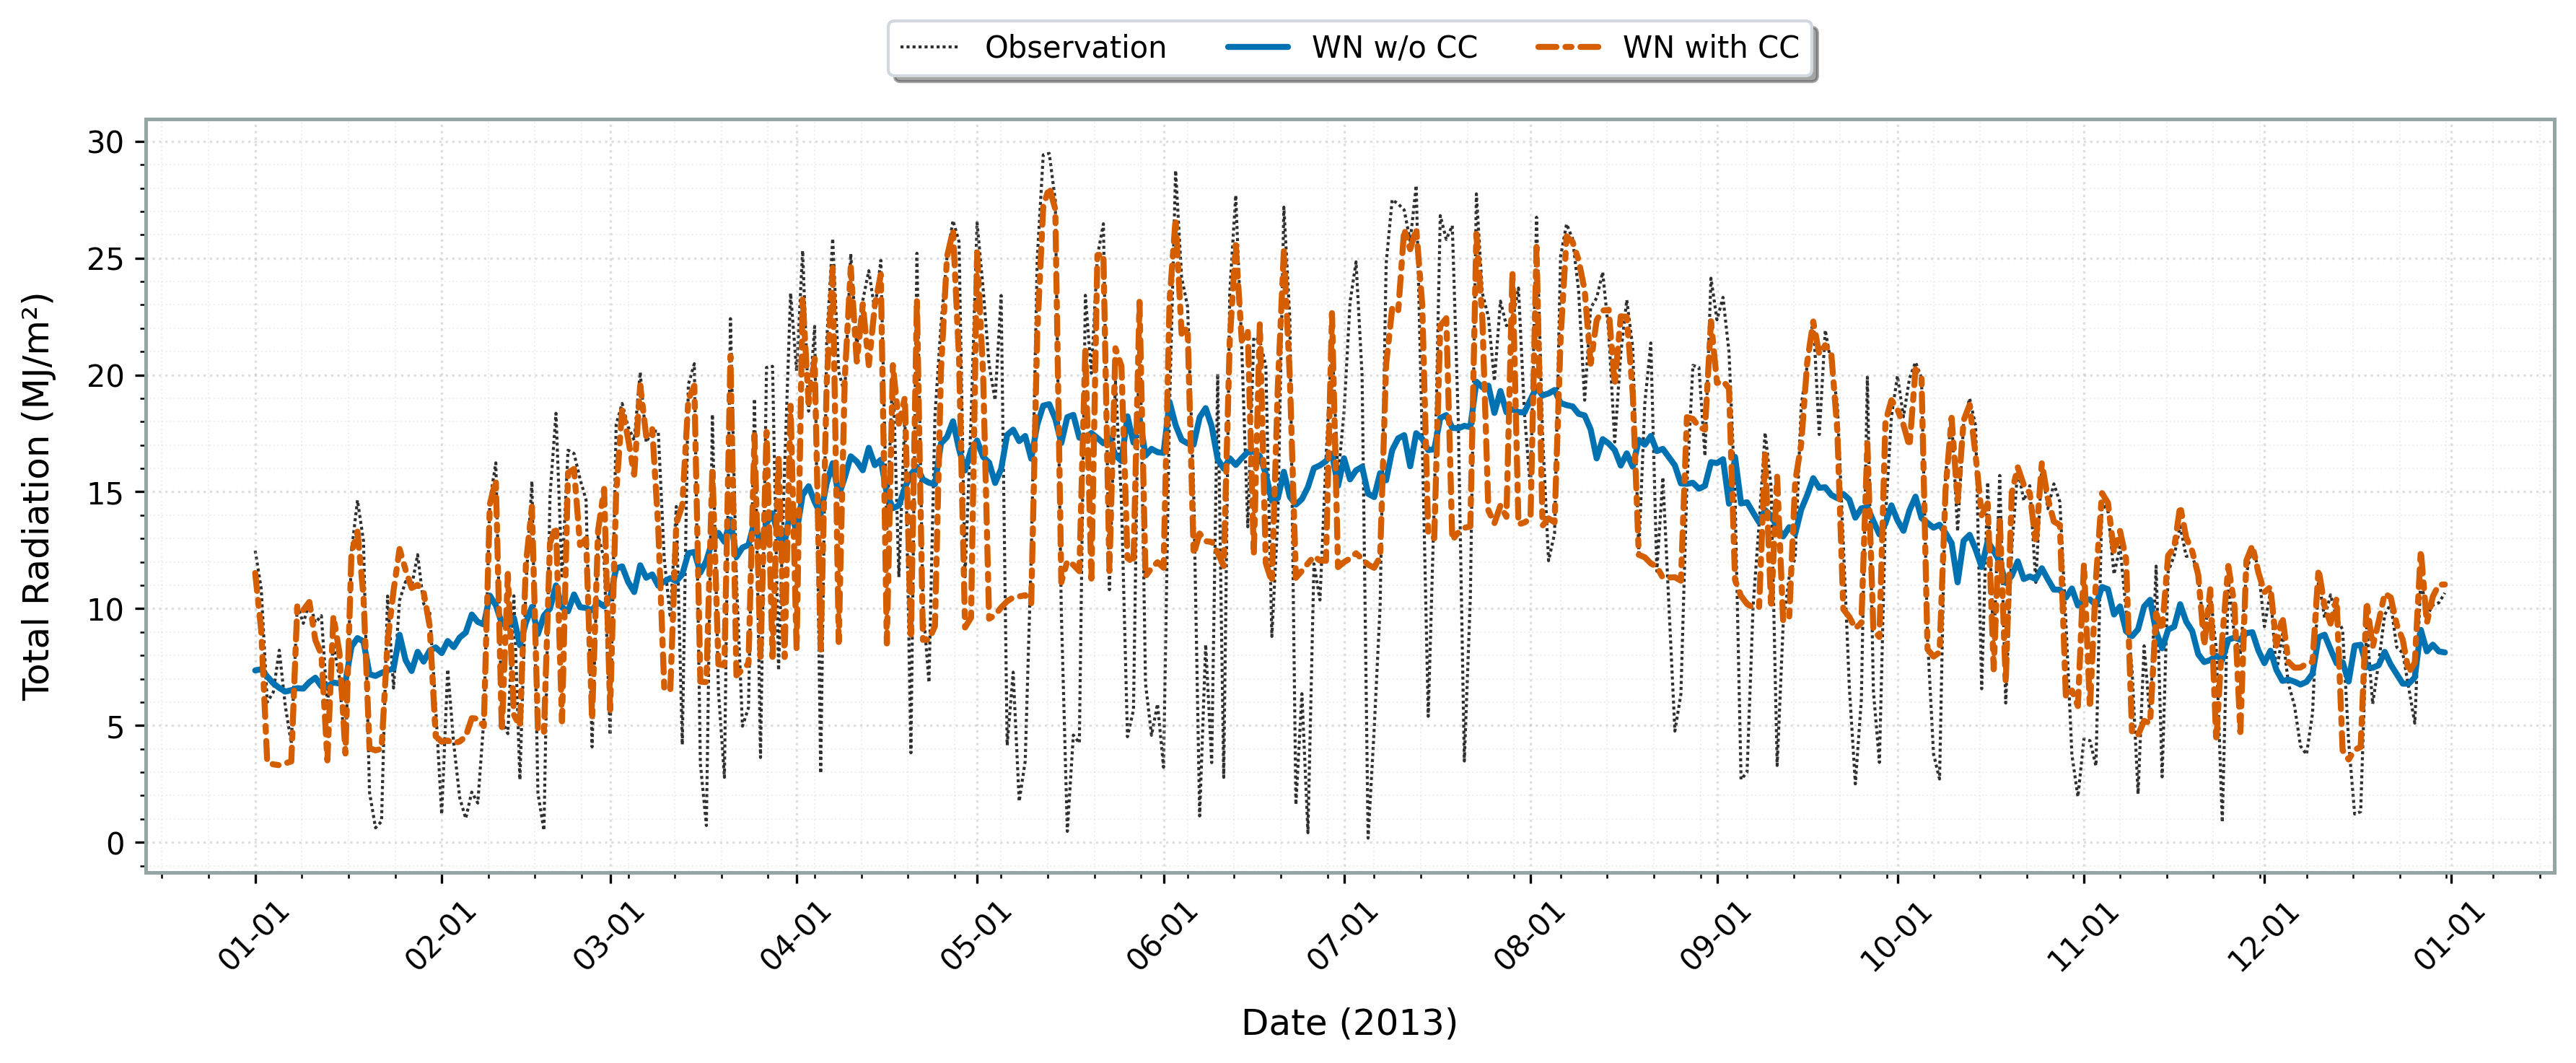

In [ ]:
#拟合图，云量分类与未分类的辐射值
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 设置专业绘图参数
plt.rcParams.update({
    'font.family': 'DejaVu Sans',  # 跨平台开源字体
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'axes.grid': True,
    'grid.alpha': 0.3
})
# 在plt.rcParams.update后添加颜色定义（色盲友好调色板）
CB_COLORS = {
    'obs': '#2F2F2F',        # 观测值使用深灰色
    'model1': '#0072B2',     # 模型1使用深蓝色（色盲安全）
    'model2': '#D55E00',     # 模型2使用橙红色（色盲安全）
    'grid': '#B0B0B0',       # 更柔和的网格线颜色
    'spine': '#707070'       # 坐标轴边框颜色
}
# 读取数据
df_test = pd.read_excel('/content/drive/MyDrive/outputdata/RF_test_58238.xlsx')
df_tcc = pd.read_excel('/content/drive/MyDrive/outputdata/RF_tcc_58238.xlsx')

# 构造日期列
for df in [df_test, df_tcc]:
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# 筛选2013年全年数据
filter_cond = lambda df: (df['Date'].dt.year == 2013)
df_test_oct = df_test.loc[filter_cond].sort_values('Date')
df_tcc_oct = df_tcc.loc[filter_cond].sort_values('Date')

# 创建画布
fig, ax = plt.subplots(figsize=(12, 5), facecolor='white')

# 辐射观测值（最底层）
ax.plot(df_test_oct['Date'], df_test_oct['TR'],
        label='Observation',
        color=CB_COLORS['obs'],
        linewidth=1.0,        # 较细线宽
        linestyle=(0, (1, 1)), # 虚线样式
        zorder=1)

# 无云分类模型（中间层）
ax.plot(df_test_oct['Date'], df_test_oct['resame'],
        label='WN w/o CC',
        color=CB_COLORS['model1'],
        linewidth=2.0,
        linestyle='-',        # 实线
        solid_capstyle='round',
        zorder=2)

# 云分类模型（顶层）
ax.plot(df_tcc_oct['Date'], df_tcc_oct['resame'],
        label='WN with CC',
        color=CB_COLORS['model2'],
        linewidth=2.0,
        linestyle=(0, (3, 1.5, 1, 1.5)),  # 自定义虚线样式
        dash_capstyle='round',
        zorder=3)

# 优化网格和边框
ax.grid(True, which='major', linestyle=':', linewidth=0.6, alpha=0.4, color=CB_COLORS['grid'])
ax.grid(False, which='minor')  # 关闭次要网格

for spine in ax.spines.values():
    spine.set_color(CB_COLORS['spine'])
    spine.set_linewidth(0.8)

# 优化图例
legend = ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.18),
    ncol=3,
    frameon=True,
    fancybox=False,          # 取消圆角
    shadow=False,            # 取消阴影
    edgecolor=CB_COLORS['spine'],
    facecolor='white'
)
# 修改点2：x轴刻度设置每月第一天
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # 每月第一天
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))    # 格式化为 月-日

# 优化标签显示
fig.autofmt_xdate(rotation=45, ha='center')
ax.set_xlabel('Date (2013)', labelpad=10)  # 更新x轴标签
ax.set_ylabel('Total Radiation (MJ/m²)', labelpad=10)

# 保持其他样式设置不变...
ax.grid(True, which='major', linestyle=':', linewidth=0.8, alpha=0.4)
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.2)
ax.minorticks_on()

legend = ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=3,
    frameon=True,
    fancybox=True,
    shadow=True,
    facecolor='white'
)
legend.get_frame().set_edgecolor('#d1d8e0')

for spine in ax.spines.values():
    spine.set_color('#95a5a6')
    spine.set_linewidth(1.2)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/outputdata/RF_Radiation_Comparison_Modified.png', dpi=300, bbox_inches='tight')
plt.show()


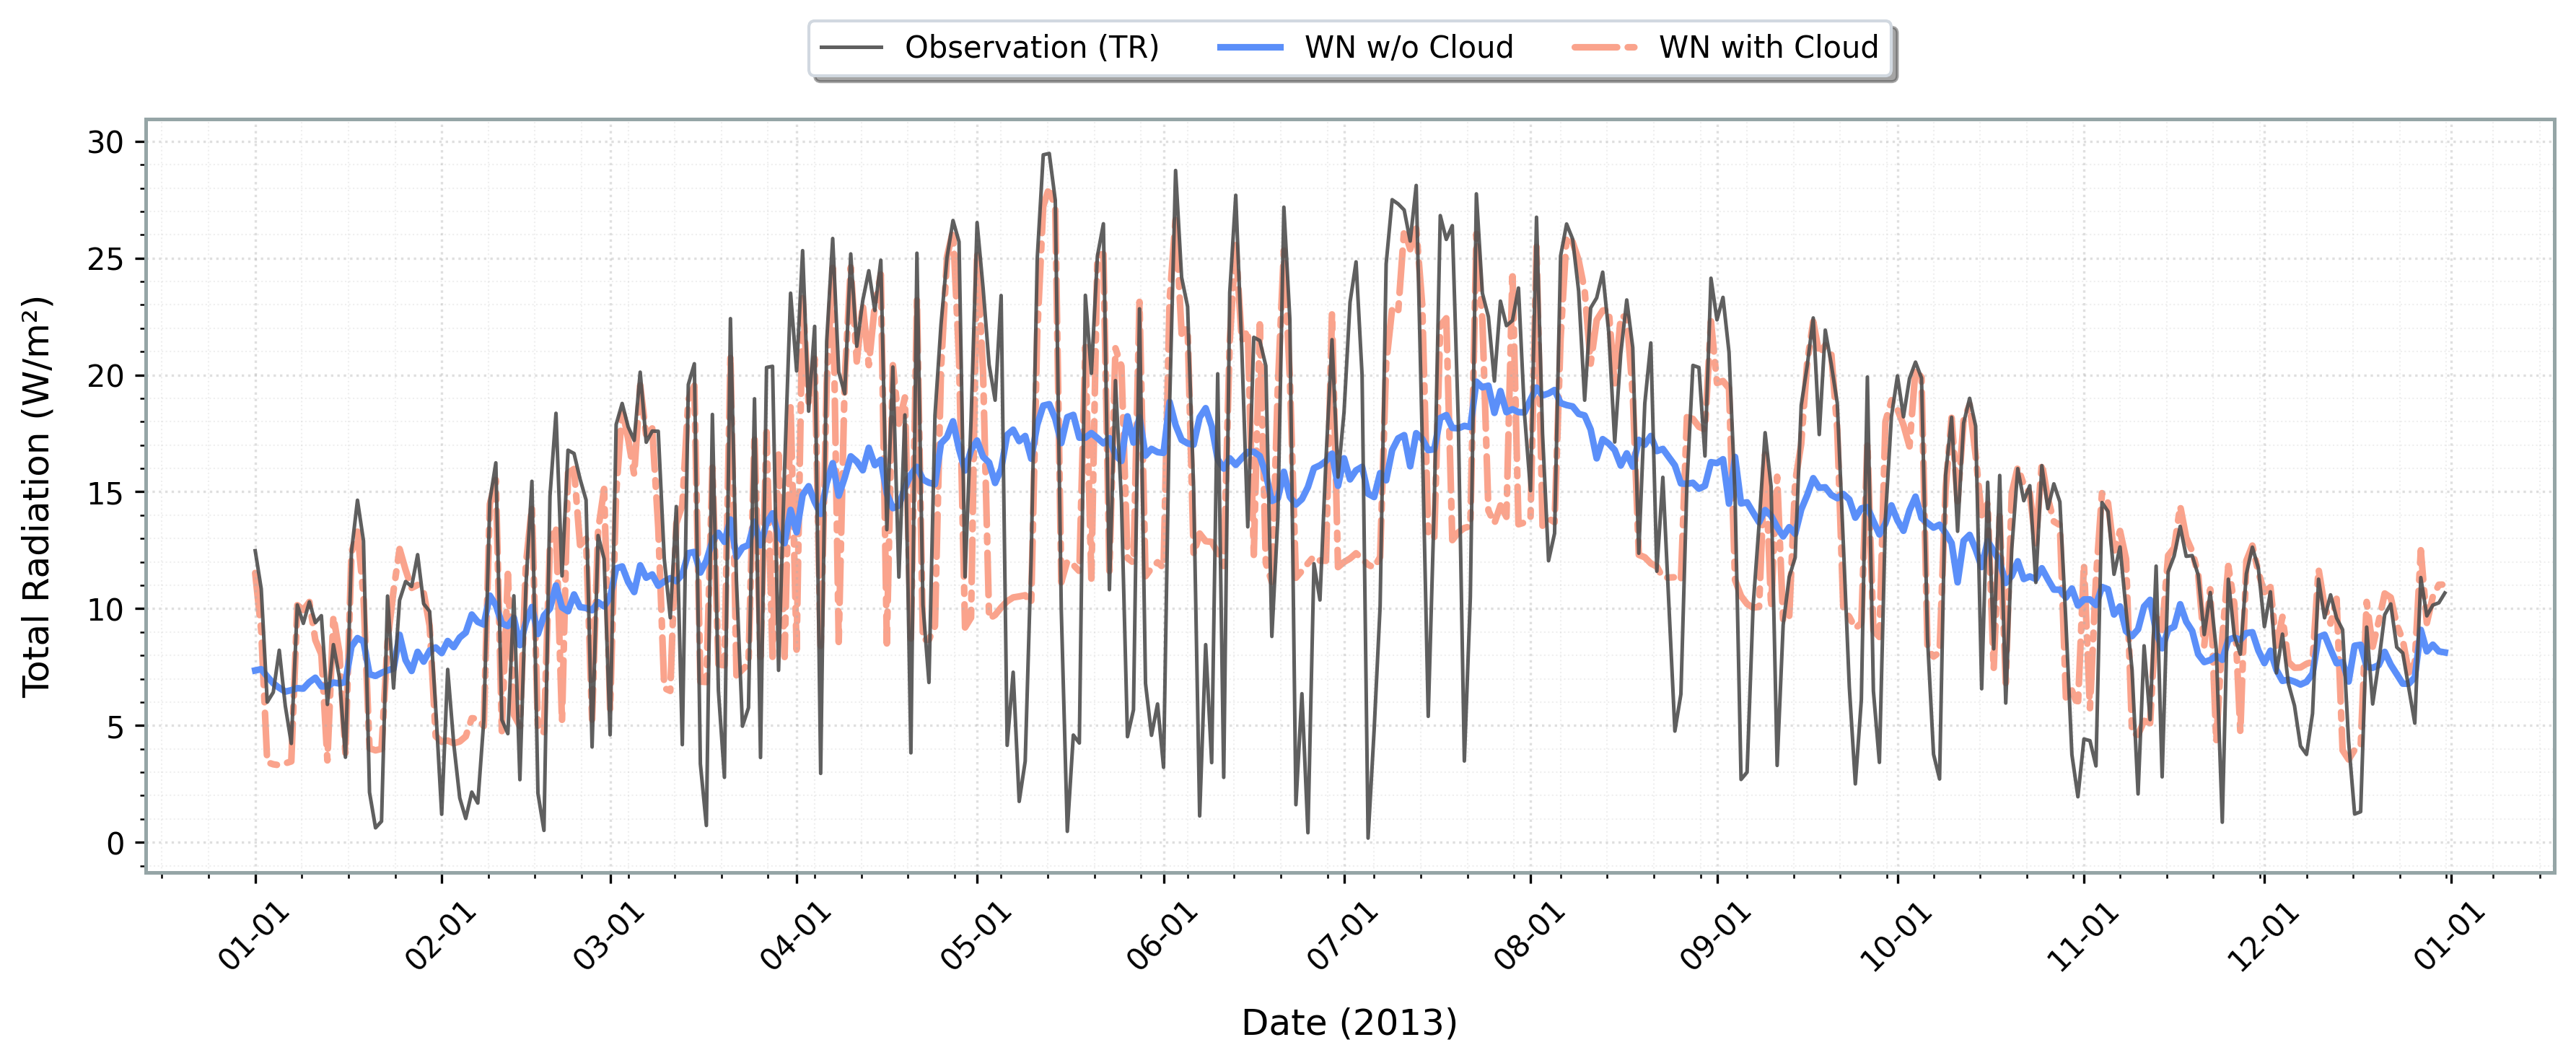

In [ ]:
#拟合图，云量分类与未分类的辐射值
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 设置专业绘图参数
plt.rcParams.update({
    'font.family': 'DejaVu Sans',  # 跨平台开源字体
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'axes.grid': True,
    'grid.alpha': 0.3
})

# 读取数据
df_test = pd.read_excel('/content/drive/MyDrive/outputdata/RF_test_58238.xlsx')
df_tcc = pd.read_excel('/content/drive/MyDrive/outputdata/RF_tcc_58238.xlsx')

# 构造日期列
for df in [df_test, df_tcc]:
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# 筛选2013年全年数据
filter_cond = lambda df: (df['Date'].dt.year == 2013)
df_test_oct = df_test.loc[filter_cond].sort_values('Date')
df_tcc_oct = df_tcc.loc[filter_cond].sort_values('Date')

# 创建画布
fig, ax = plt.subplots(figsize=(12, 5), facecolor='white')

# 辐射观测值
ax.plot(df_test_oct['Date'], df_test_oct['TR'],
        label='Observation',
        color='#4D4D4D',
        alpha=0.9,
        linewidth=1.2,
        linestyle='-',
        zorder=3)

# 无云分类 模型曲线
ax.plot(df_test_oct['Date'], df_test_oct['resame'],
        label='WN w/o CC',
        color='#5B8FF9',
        linewidth=2.2,
        linestyle='-',
        zorder=2)

# 云分类 模型曲线
ax.plot(df_tcc_oct['Date'], df_tcc_oct['resame'],
        label='WN with CC',
        color='#F97C5B',
        linewidth=2.2,
        alpha=0.7,
        linestyle='-.',
        dash_capstyle='round',
        zorder=1)

# 修改点2：x轴刻度设置每月第一天
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # 每月第一天
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))    # 格式化为 月-日

# 优化标签显示
fig.autofmt_xdate(rotation=45, ha='center')
ax.set_xlabel('Date (2013)', labelpad=10)  # 更新x轴标签
ax.set_ylabel('Total Radiation (MJ/m²)', labelpad=10)

# 保持其他样式设置不变...
ax.grid(True, which='major', linestyle=':', linewidth=0.8, alpha=0.4)
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.2)
ax.minorticks_on()

legend = ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=3,
    frameon=True,
    fancybox=True,
    shadow=True,
    facecolor='white'
)
legend.get_frame().set_edgecolor('#d1d8e0')

for spine in ax.spines.values():
    spine.set_color('#95a5a6')
    spine.set_linewidth(1.2)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/outputdata/RF_Radiation_Comparison_Modified.png', dpi=300, bbox_inches='tight')
plt.show()


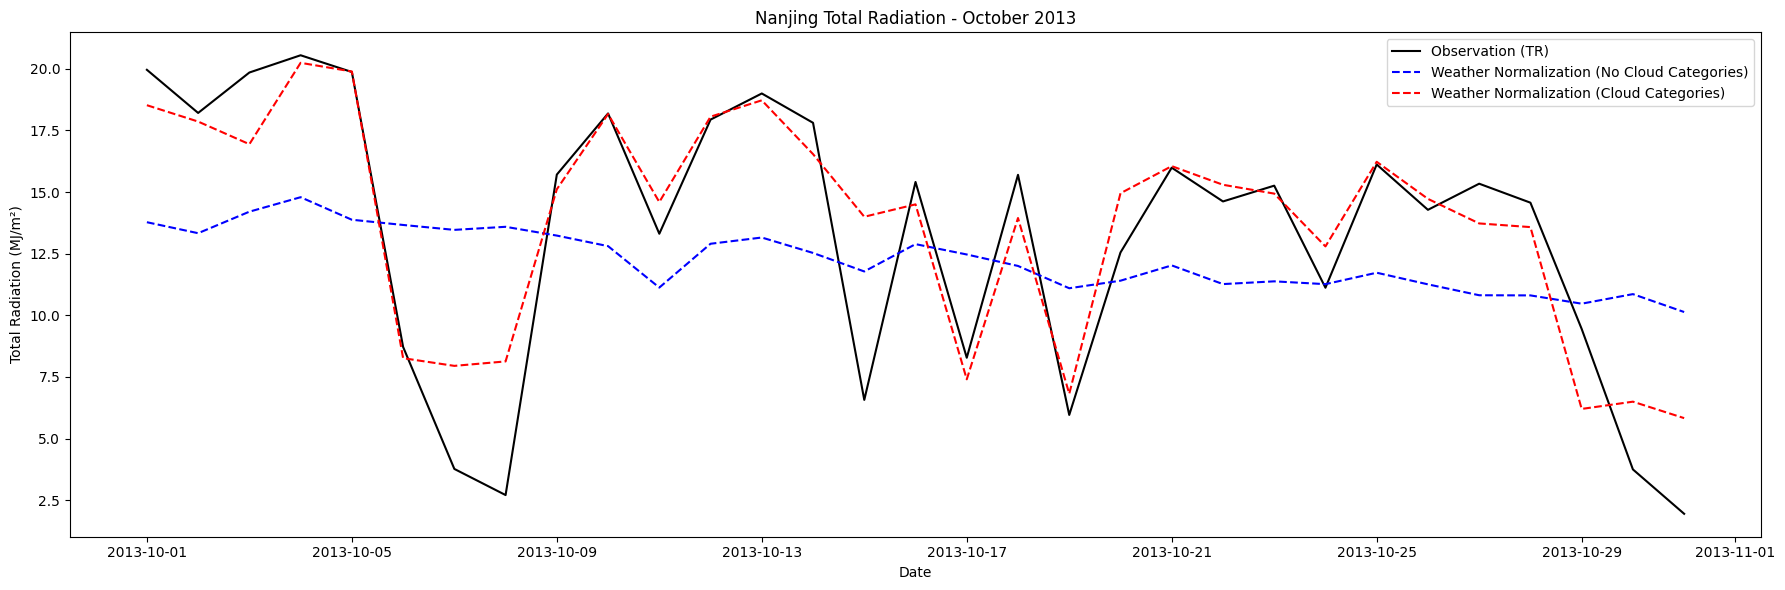

In [ ]:
#拟合图，云量分类与未分类
import pandas as pd
import matplotlib.pyplot as plt

# 读取两个文件
df_test = pd.read_excel('/content/drive/MyDrive/outputdata/RF_test_58238.xlsx')
df_tcc = pd.read_excel('/content/drive/MyDrive/outputdata/RF_tcc_58238.xlsx')

# 构造日期列
df_test['Date'] = pd.to_datetime(df_test[['Year', 'Month', 'Day']])
df_tcc['Date'] = pd.to_datetime(df_tcc[['Year', 'Month', 'Day']])

# 筛选2013年10月
df_test_oct = df_test[(df_test['Date'].dt.year == 2013) & (df_test['Date'].dt.month == 10)].sort_values('Date')
df_tcc_oct = df_tcc[(df_tcc['Date'].dt.year == 2013) & (df_tcc['Date'].dt.month == 10)].sort_values('Date')

# 绘图
plt.figure(figsize=(18, 6))
plt.plot(df_test_oct['Date'], df_test_oct['TR'], label='Observation (TR)', color='black')
plt.plot(df_test_oct['Date'], df_test_oct['resame'], label='Weather Normalization (No Cloud Categories)', color='blue', linestyle='--')
plt.plot(df_tcc_oct['Date'], df_tcc_oct['resame'], label='Weather Normalization (Cloud Categories)', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Total Radiation (MJ/m²)')
plt.title('Nanjing Total Radiation - October 2013')
plt.legend()
plt.grid(False)  # 去掉网格线
plt.tight_layout()
plt.show()
